# Use auto.arima in R to find order for each station

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
ts=robjects.r('ts')
forecast = importr('forecast')

In [10]:
datetime.datetime.now()

datetime.datetime(2017, 4, 24, 15, 48, 36, 814077)

In [11]:
r_order_dict = {}
os.chdir('/Users/WhoaaaItsDavid/Desktop/Springboard/Bike_Share/R_Series')
for filename in os.listdir('/Users/WhoaaaItsDavid/Desktop/Springboard/Bike_Share/R_Series'):
    if filename.endswith('.csv'):
        train_df = pd.read_csv(filename, header=None, names=['Date','Capacity'])
        train_df['Date'] = pd.to_datetime(train_df['Date'], infer_datetime_format=True)
        train_df.set_index('Date', inplace=True)
        r_data = ts(train_df)
        fit = forecast.auto_arima(r_data, d=0, max_p=20, max_q=20, start_p=1, start_q=1, ic='aic')
        forecast_output = forecast.forecast(fit)
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[2].rstrip(')'))
        except:
            pass
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[2].rstrip(')'))
        except:
            pass
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[2].rstrip(')'))
        except:
            pass
        
        r_order_dict[filename.rstrip('.csv')] = [p,d,q]

In [12]:
datetime.datetime.now()

datetime.datetime(2017, 4, 24, 16, 21, 14, 348332)

In [14]:
r_order_dict

{'31014': [2, 0, 2],
 '31101': [2, 0, 6],
 '31104': [2, 0, 5],
 '31108': [2, 0, 4],
 '31109': [2, 0, 6],
 '31110': [1, 0, 0],
 '31114': [3, 0, 5],
 '31116': [3, 0, 2],
 '31119': [3, 0, 2],
 '31121': [2, 0, 7],
 '31200': [1, 0, 1],
 '31201': [2, 0, 1],
 '31202': [2, 0, 3],
 '31203': [2, 0, 4],
 '31205': [4, 0, 2],
 '31212': [3, 0, 2],
 '31213': [2, 0, 8],
 '31214': [2, 0, 1],
 '31215': [1, 0, 0],
 '31218': [1, 0, 2],
 '31219': [2, 0, 2],
 '31222': [4, 0, 4],
 '31223': [4, 0, 3],
 '31225': [10, 0, 1],
 '31227': [2, 0, 3],
 '31228': [2, 0, 5],
 '31229': [2, 0, 5],
 '31230': [3, 0, 4],
 '31231': [3, 0, 2],
 '31232': [4, 0, 11],
 '31233': [4, 0, 2],
 '31234': [2, 0, 1],
 '31237': [2, 0, 1],
 '31238': [3, 0, 2],
 '31239': [3, 0, 6],
 '31240': [1, 0, 3],
 '31241': [1, 0, 1],
 '31243': [2, 0, 3],
 '31244': [1, 0, 2],
 '31245': [2, 0, 1],
 '31246': [1, 0, 2],
 '31247': [3, 0, 2],
 '31248': [1, 0, 0],
 '31249': [2, 0, 1],
 '31257': [3, 0, 3],
 '31258': [3, 0, 1],
 '31263': [1, 0, 0],
 '31265': [

In [91]:
def general_SARIMA2(station, enforce_stationarity=False, enforce_invertibility=False):

    # Mask for station and transform to series object
    station_df = new_target_discrete_bike_data[new_target_discrete_bike_data['Station_Number'] == station]
    station_df = station_df[['Count_Percent_Capacity', 'Date']]
    series_station = station_df.set_index('Date')
    series_station = series_station['Count_Percent_Capacity'] 

    # Test stationarity
    print('Station {}'.format(station))
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series_station, autolag='AIC')
    if dftest[0] < dftest[4]['1%']:
        print('We are 99% confident that the series is stationary.\n')
    elif dftest[0] < dftest[4]['5%']:
        print('We are 95% confident that the series is stationary.\n')
    elif dftest[0] < dftest[4]['10%']:
        print('We are 90% confident that the series is stationary.\n')
    else:
        print('We are not confident that the series is stationary.\n')

    # SARIMAX Model without exogs
    X = series_station.copy()
    size = int(len(X) * 0.995)
    X_train, X_test = X[(int(len(X) * 0.90)):-25], X[-24:]

    model = SARIMAX(X_train,
                    enforce_stationarity=enforce_stationarity,
                    enforce_invertibility=enforce_invertibility,
                    order=(r_order_dict[str(station)][0], 
                           r_order_dict[str(station)][1], 
                           r_order_dict[str(station)][2]),
                    trend='c')
    results_SARIMAX = model.fit()

    # Plot the forecast
    pred = results_SARIMAX.get_prediction(start=X_train.index[-1], 
                                          end=X_test.index[-1],
                                          dynamic=False)
    pred_ci = pred.conf_int()

    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)

    ax = X_test.plot(label='Observed')
    pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Station Capacity')
    plt.legend()

    plt.show()

    # Compute the RMSE
    y_forecasted = pred.predicted_mean
    y_truth = X_test
    mse = ((y_forecasted - y_truth) ** 2).mean()
    rmse = mse**0.5
    print('RMSE: {:.2f}'.format(rmse))
    print('Order: ({},{},{})\n\n'.format(r_order_dict[str(station)][0], 
                                     r_order_dict[str(station)][1], 
                                     r_order_dict[str(station)][2]))

Station 31014
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



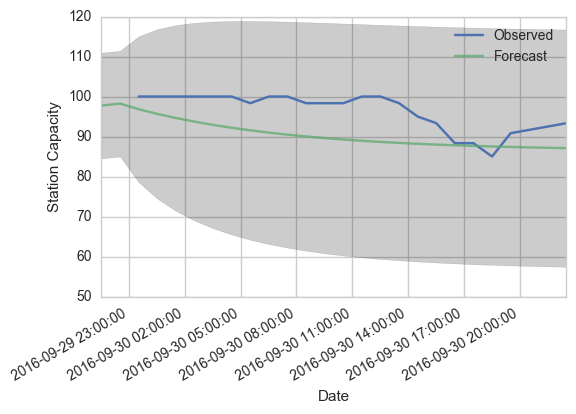

RMSE: 7.02
Order: (2,0,2)


Station 31101
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


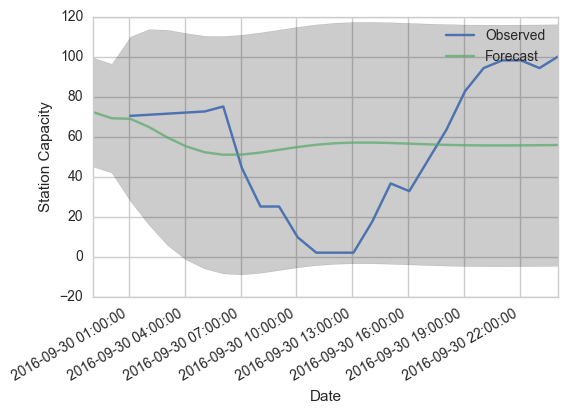

RMSE: 32.90
Order: (2,0,6)


Station 31104
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


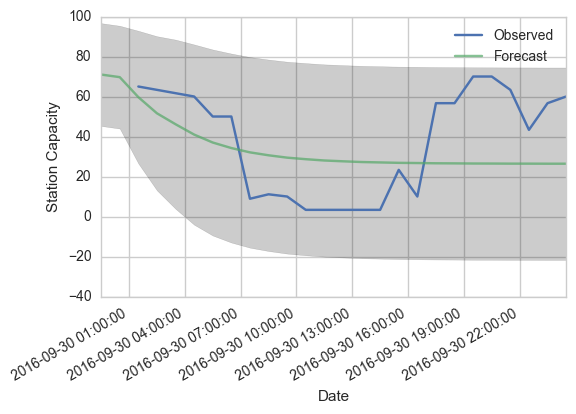

RMSE: 25.03
Order: (2,0,5)


Station 31108
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


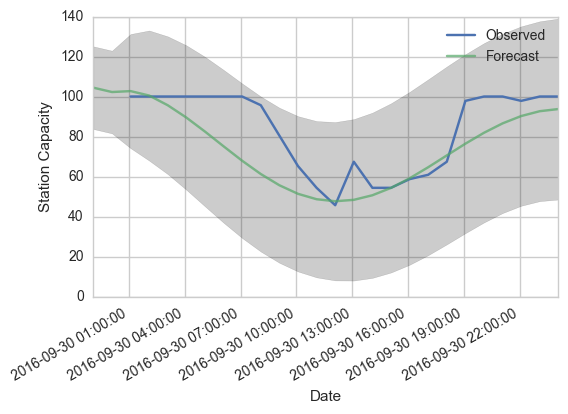

RMSE: 15.34
Order: (2,0,4)


Station 31109
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


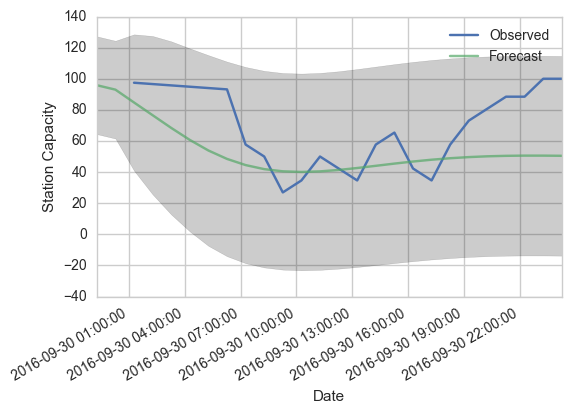

RMSE: 26.48
Order: (2,0,6)


Station 31110
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



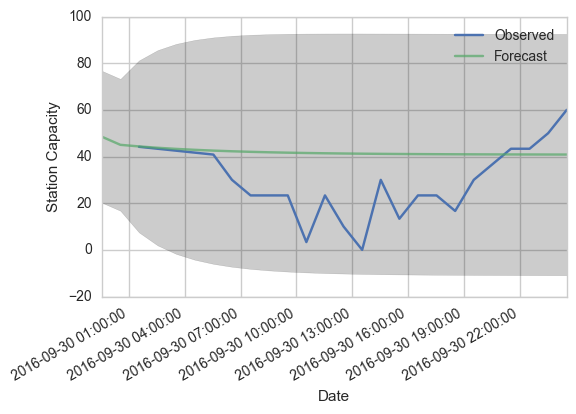

RMSE: 18.65
Order: (1,0,0)


Station 31114
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


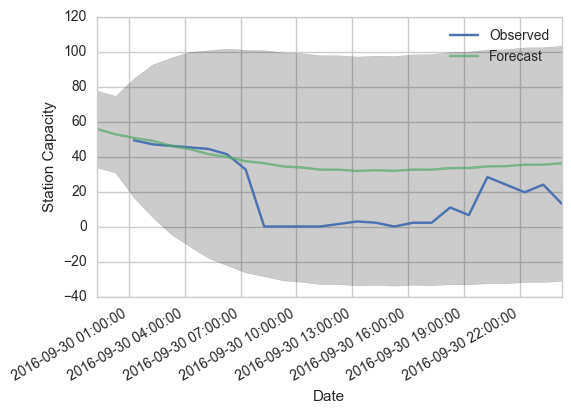

RMSE: 22.88
Order: (3,0,5)


Station 31116
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


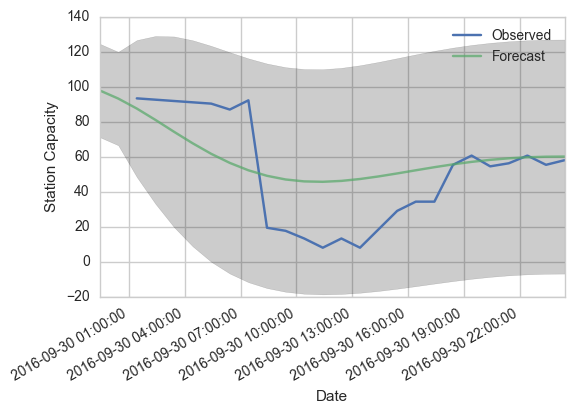

RMSE: 23.60
Order: (3,0,2)


Station 31119
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


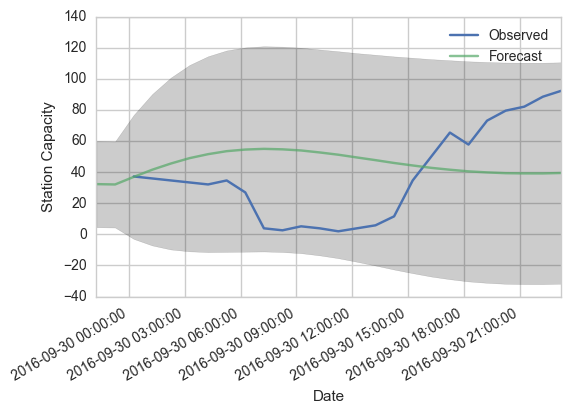

RMSE: 35.48
Order: (3,0,2)


Station 31121
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



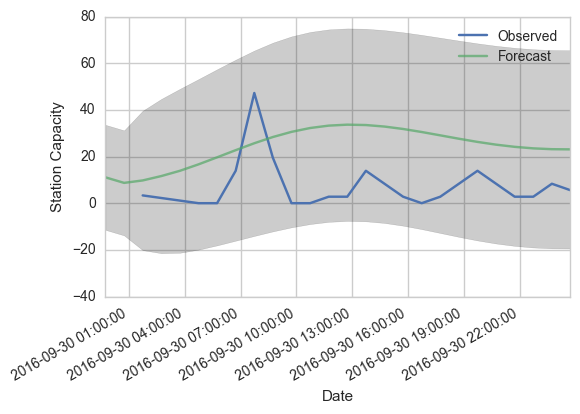

RMSE: 21.50
Order: (2,0,7)


Station 31200
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



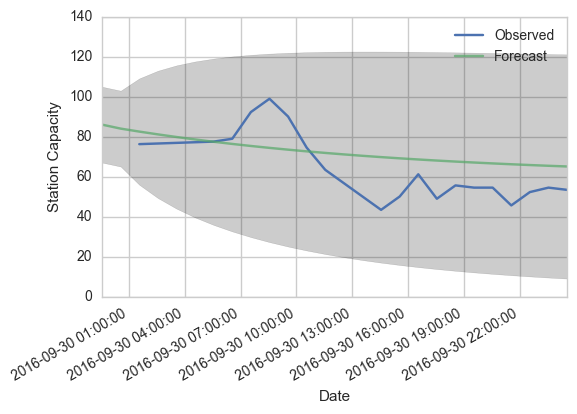

RMSE: 14.03
Order: (1,0,1)


Station 31201
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



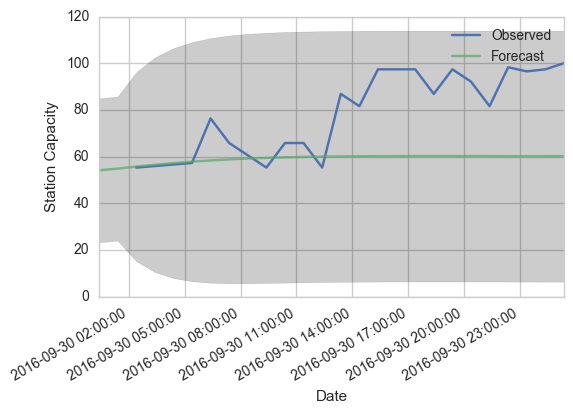

RMSE: 25.11
Order: (2,0,1)


Station 31202
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


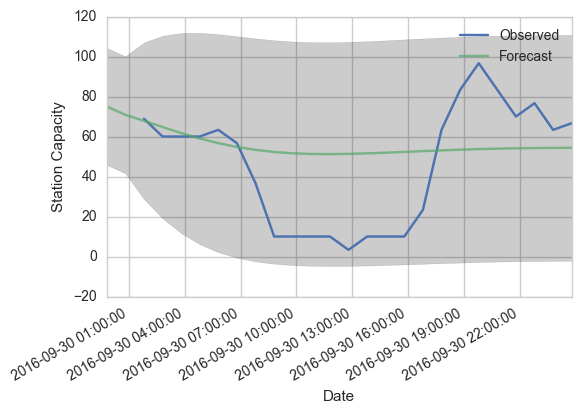

RMSE: 29.16
Order: (2,0,3)


Station 31203
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


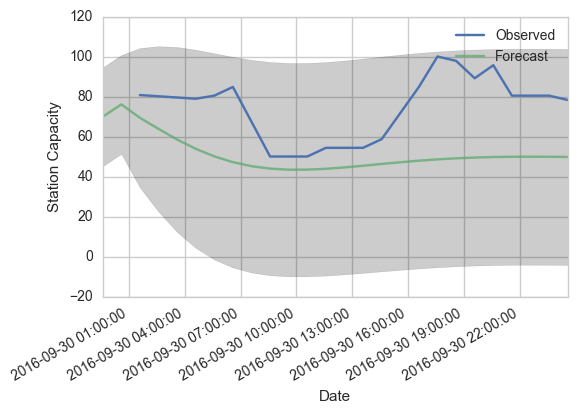

RMSE: 28.23
Order: (2,0,4)


Station 31205
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


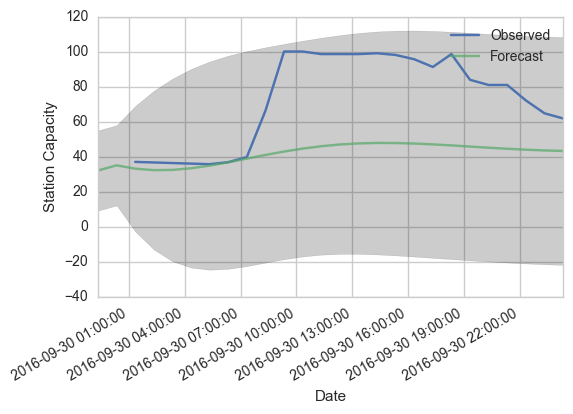

RMSE: 37.03
Order: (4,0,2)


Station 31212
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


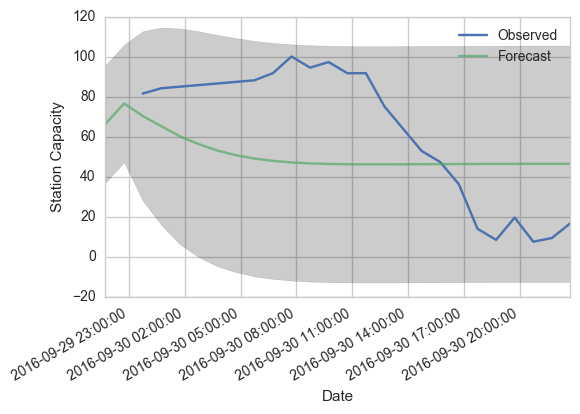

RMSE: 34.17
Order: (3,0,2)


Station 31213
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


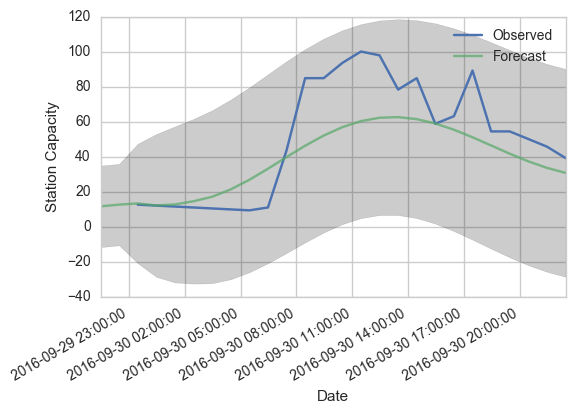

RMSE: 21.10
Order: (2,0,8)


Station 31214
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


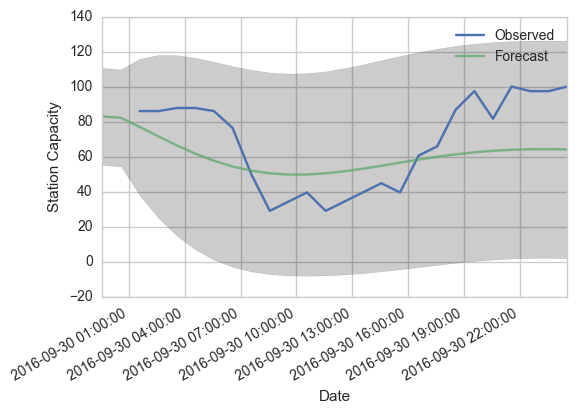

RMSE: 22.28
Order: (2,0,1)


Station 31215
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



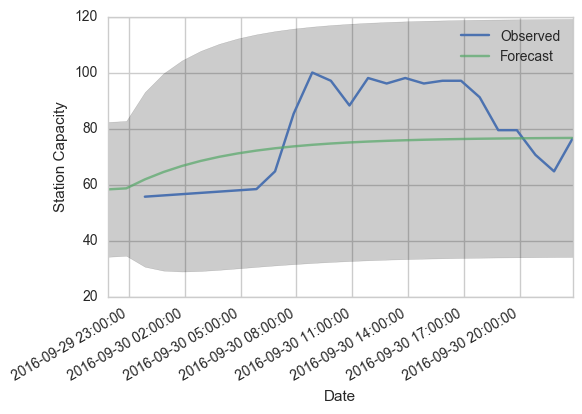

RMSE: 15.17
Order: (1,0,0)


Station 31218
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



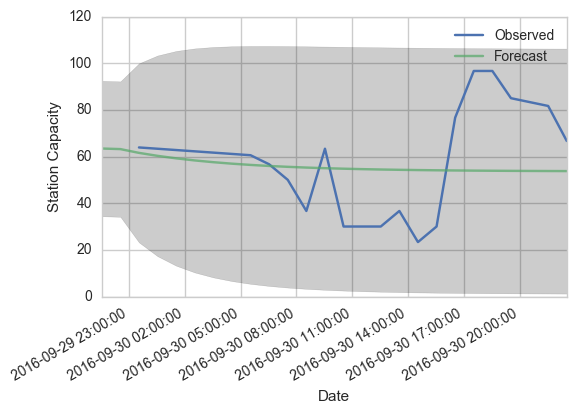

RMSE: 21.56
Order: (1,0,2)


Station 31219
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



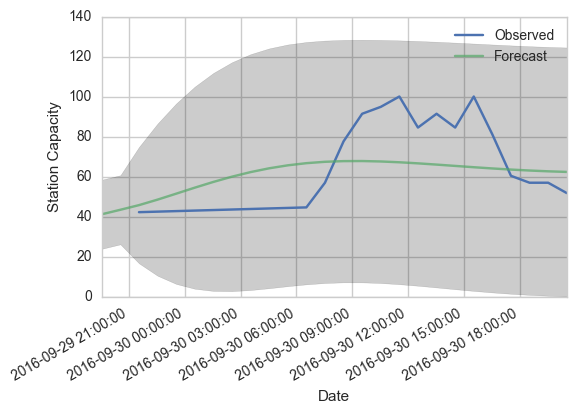

RMSE: 18.33
Order: (2,0,2)


Station 31222
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


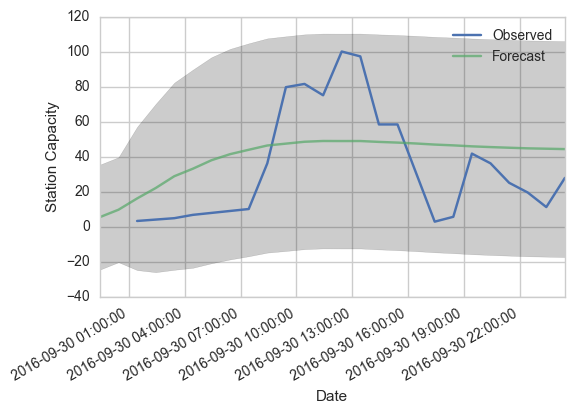

RMSE: 28.41
Order: (4,0,4)


Station 31223
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


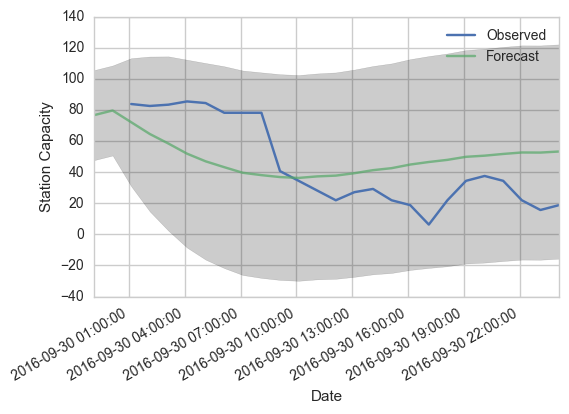

RMSE: 25.97
Order: (4,0,3)


Station 31225
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


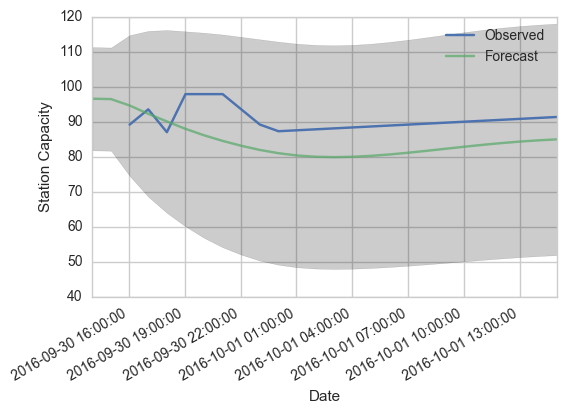

RMSE: 7.89
Order: (10,0,1)


Station 31227
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


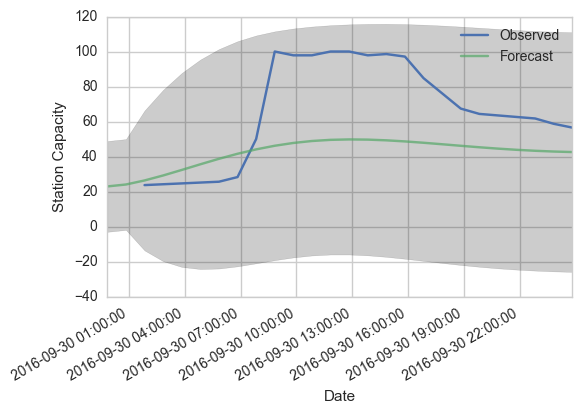

RMSE: 32.33
Order: (2,0,3)


Station 31228
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


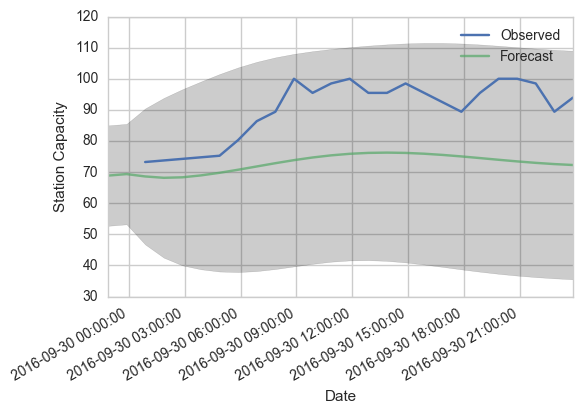

RMSE: 18.60
Order: (2,0,5)


Station 31229
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


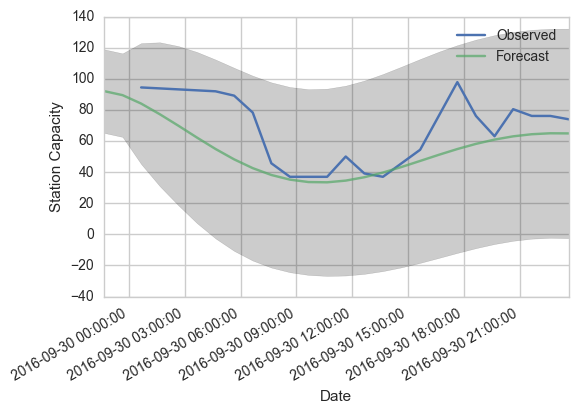

RMSE: 20.44
Order: (2,0,5)


Station 31230
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


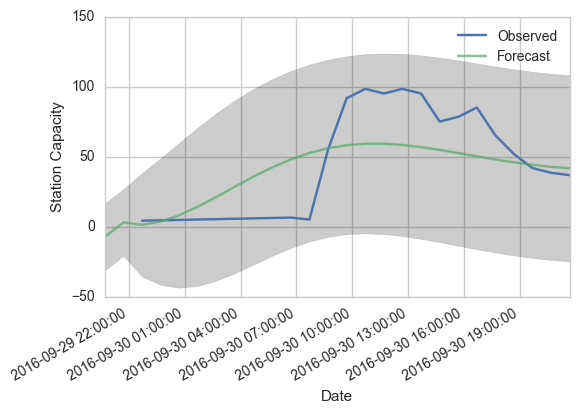

RMSE: 26.42
Order: (3,0,4)


Station 31231
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


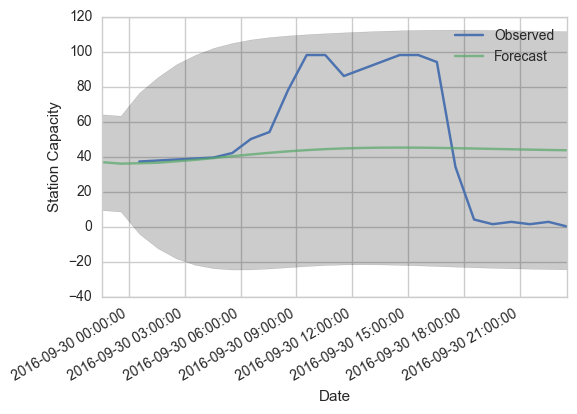

RMSE: 36.62
Order: (3,0,2)


Station 31232
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


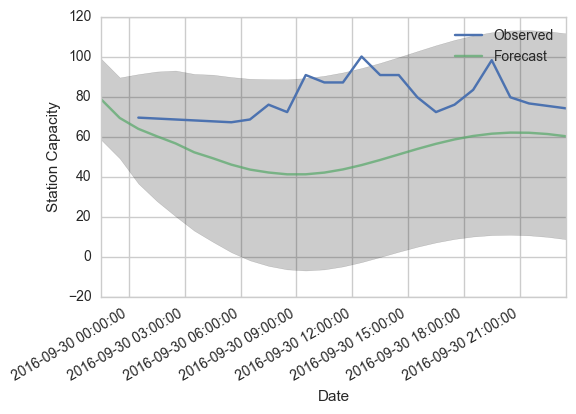

RMSE: 29.42
Order: (4,0,11)


Station 31233
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


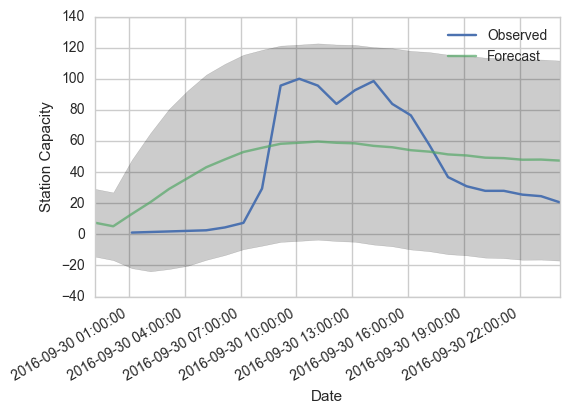

RMSE: 29.73
Order: (4,0,2)


Station 31234
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



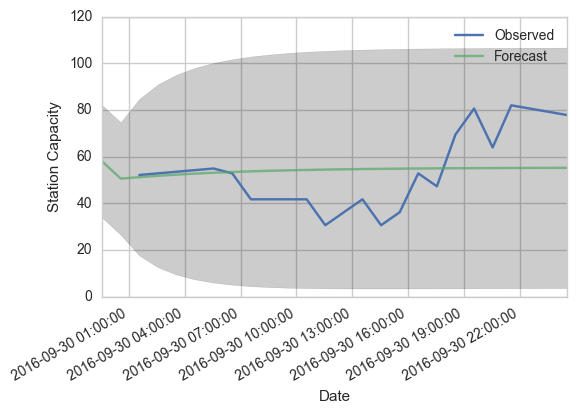

RMSE: 15.92
Order: (2,0,1)


Station 31237
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



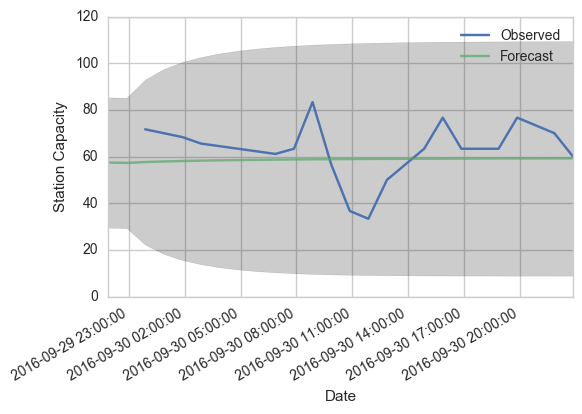

RMSE: 11.99
Order: (2,0,1)


Station 31238
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


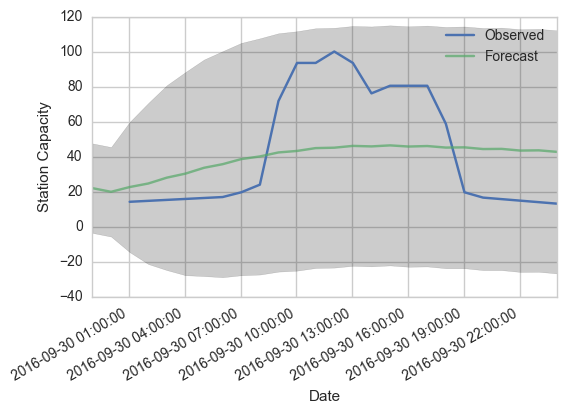

RMSE: 30.50
Order: (3,0,2)


Station 31239
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


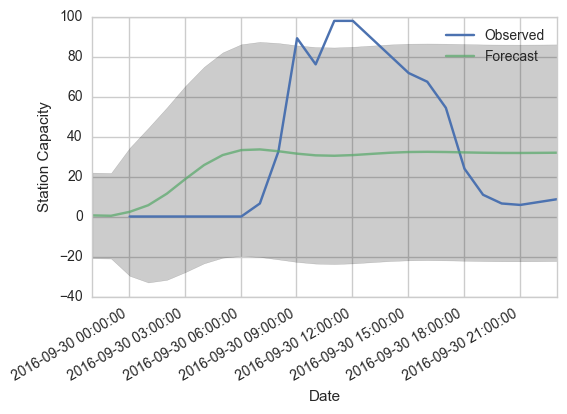

RMSE: 35.56
Order: (3,0,6)


Station 31240
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



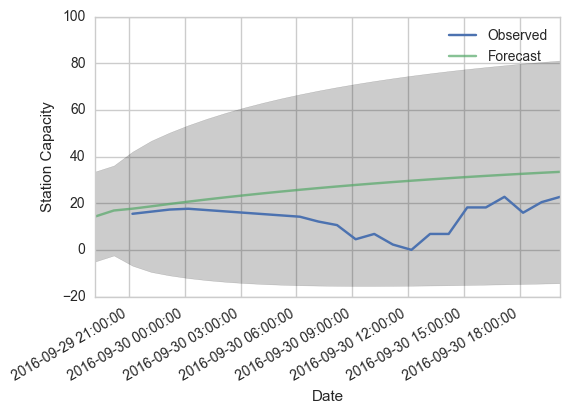

RMSE: 15.34
Order: (1,0,3)


Station 31241
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



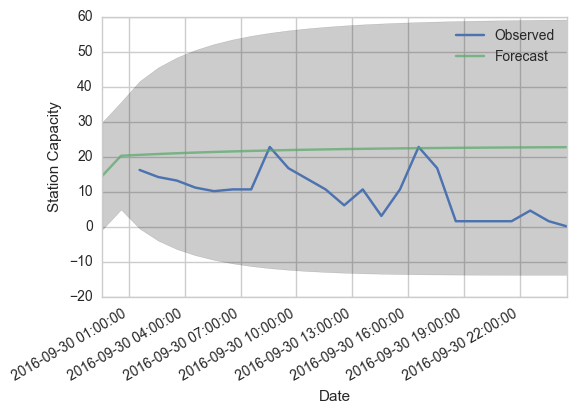

RMSE: 14.14
Order: (1,0,1)


Station 31243
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



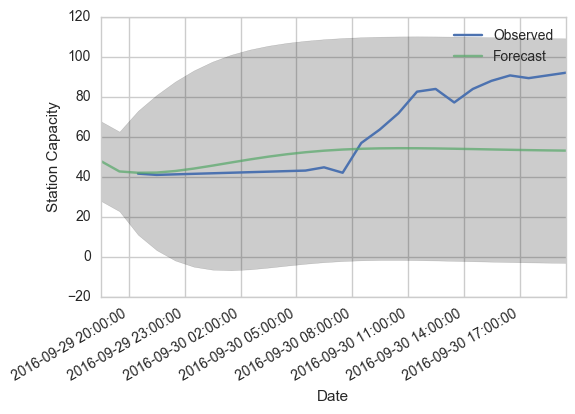

RMSE: 21.22
Order: (2,0,3)


Station 31244
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



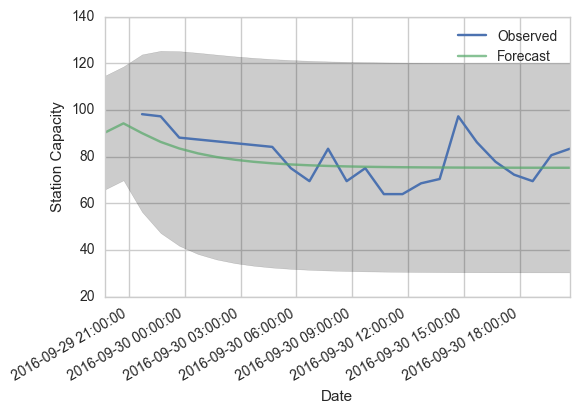

RMSE: 8.33
Order: (1,0,2)


Station 31245
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



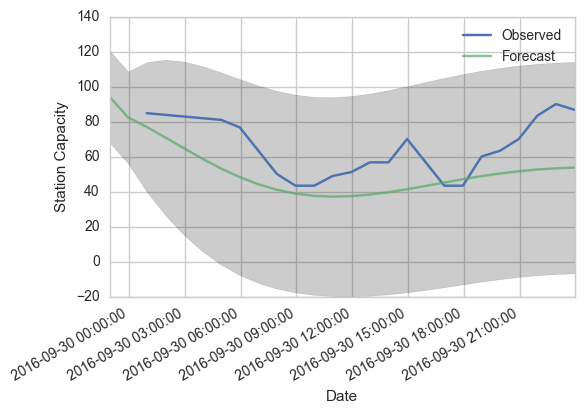

RMSE: 19.56
Order: (2,0,1)


Station 31246
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



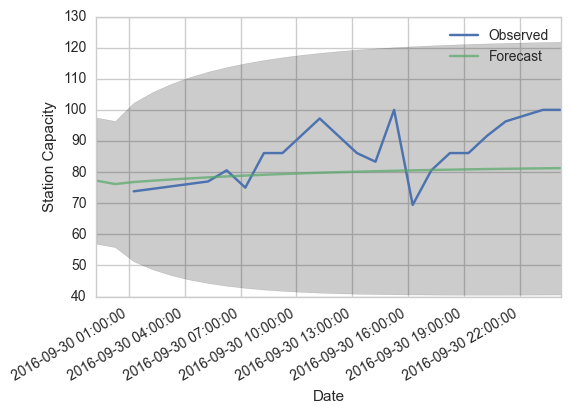

RMSE: 10.56
Order: (1,0,2)


Station 31247
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



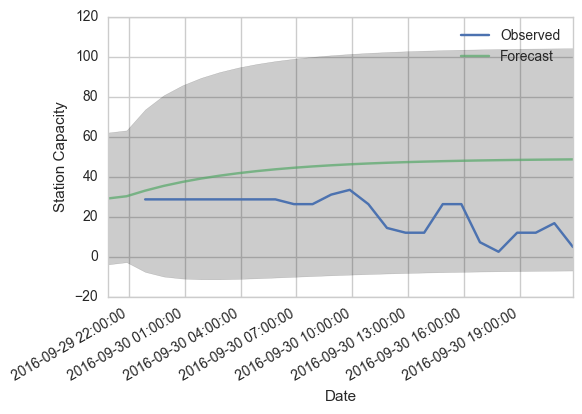

RMSE: 26.08
Order: (3,0,2)


Station 31248
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



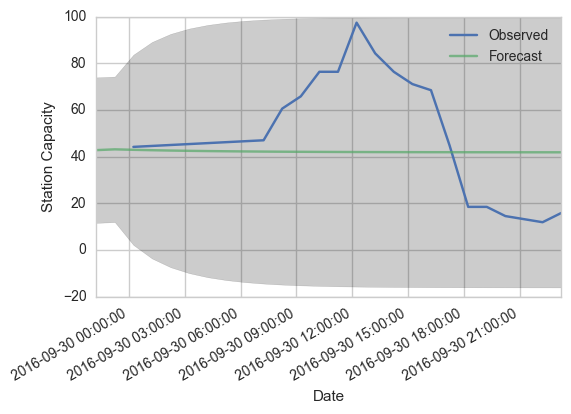

RMSE: 25.17
Order: (1,0,0)


Station 31249
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



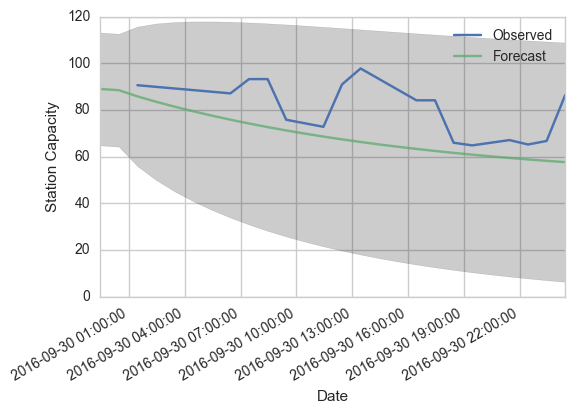

RMSE: 16.05
Order: (2,0,1)


Station 31257
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


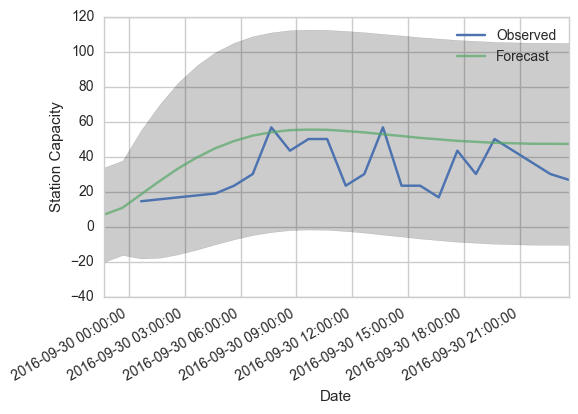

RMSE: 18.61
Order: (3,0,3)


Station 31258
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



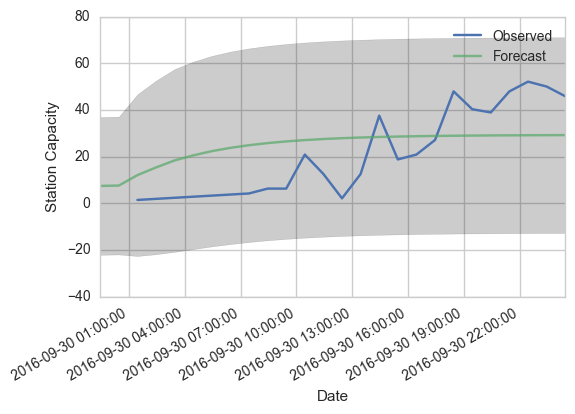

RMSE: 16.38
Order: (3,0,1)


Station 31263
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



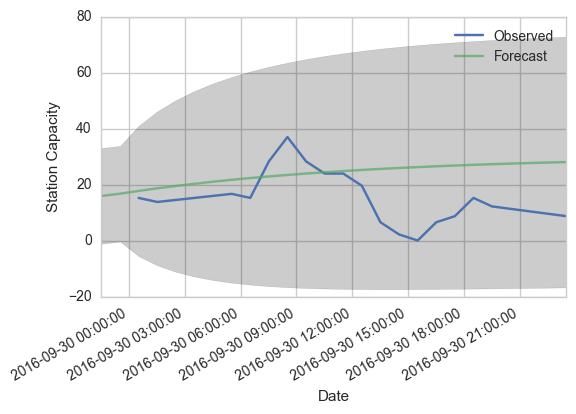

RMSE: 13.57
Order: (1,0,0)


Station 31265
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


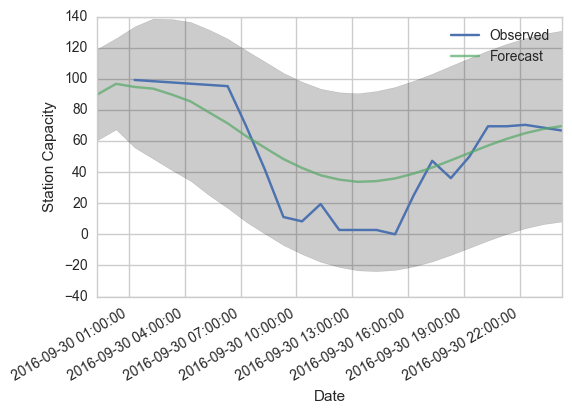

RMSE: 19.53
Order: (3,0,5)


Station 31266
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


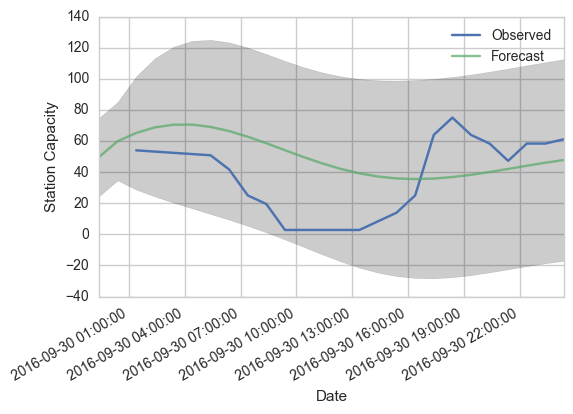

RMSE: 28.65
Order: (3,0,2)


Station 31267
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



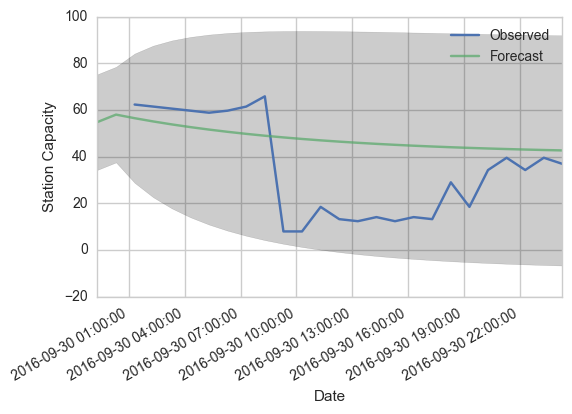

RMSE: 22.37
Order: (1,0,0)


Station 31268
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


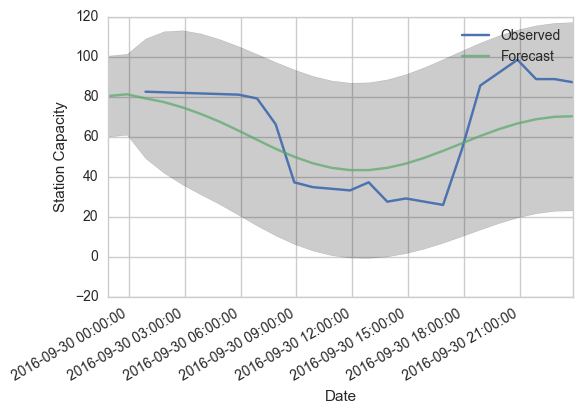

RMSE: 17.26
Order: (2,0,6)


Station 31269
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



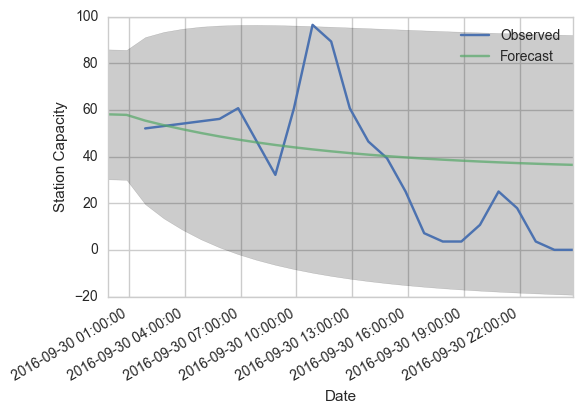

RMSE: 24.92
Order: (4,0,0)


Station 31270
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



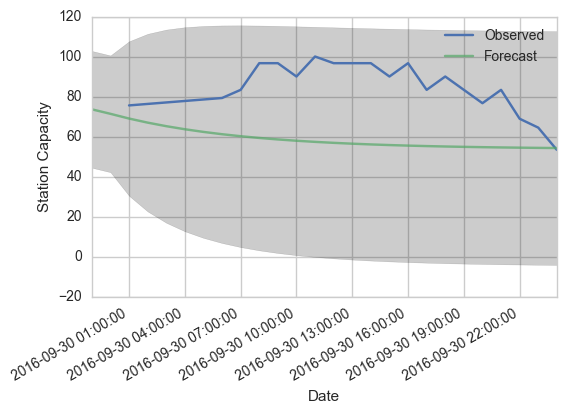

RMSE: 28.49
Order: (1,0,0)


Station 31271
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


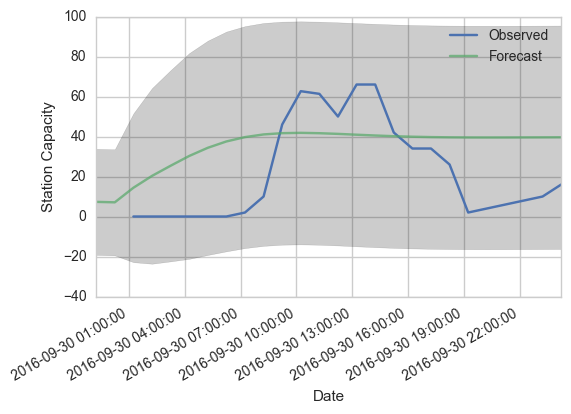

RMSE: 25.68
Order: (3,0,5)


Station 31272
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


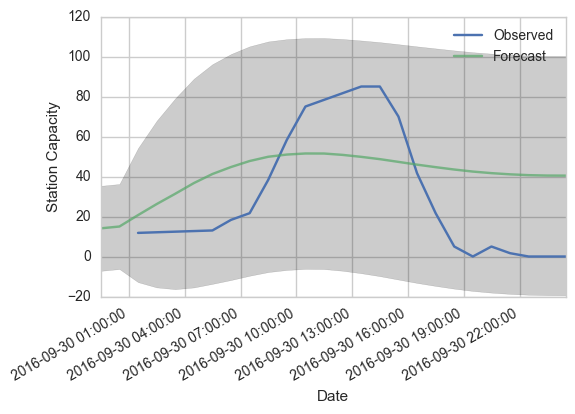

RMSE: 29.25
Order: (5,0,4)


Station 31277
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


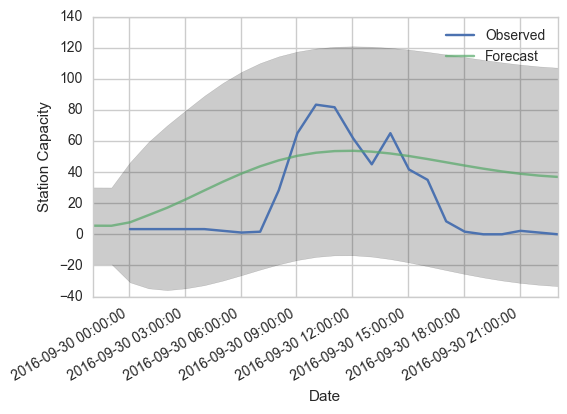

RMSE: 28.19
Order: (3,0,5)


Station 31278
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



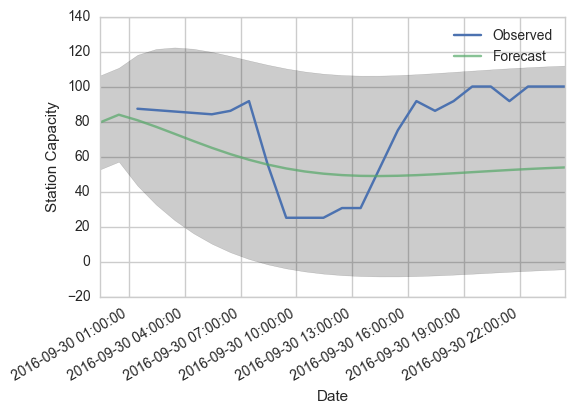

RMSE: 31.49
Order: (2,0,1)


Station 31281
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



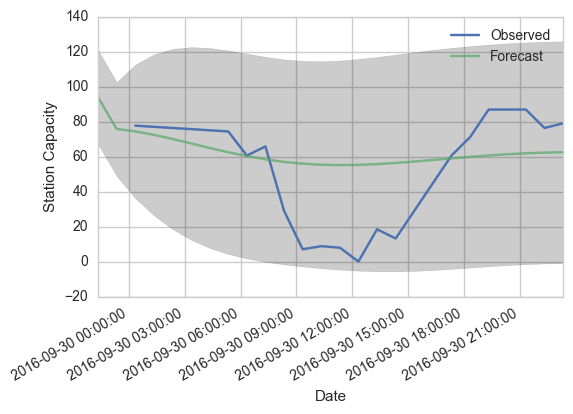

RMSE: 27.27
Order: (2,0,1)


Station 31600
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


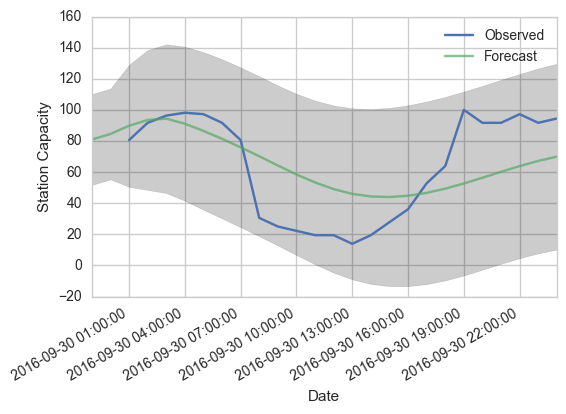

RMSE: 25.71
Order: (10,0,3)


Station 31602
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


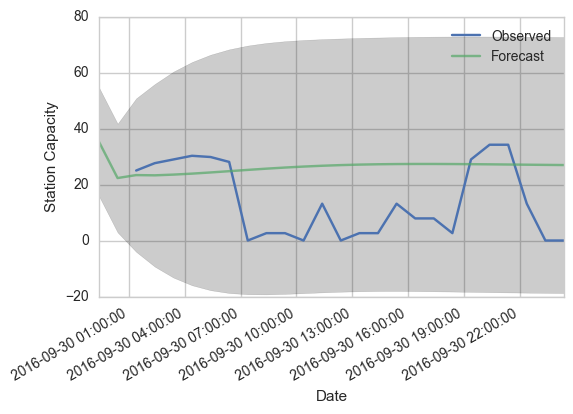

RMSE: 18.23
Order: (3,0,3)


Station 31603
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


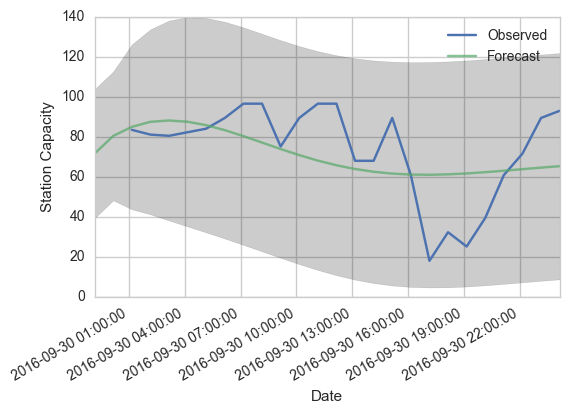

RMSE: 20.14
Order: (4,0,1)


Station 31613
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



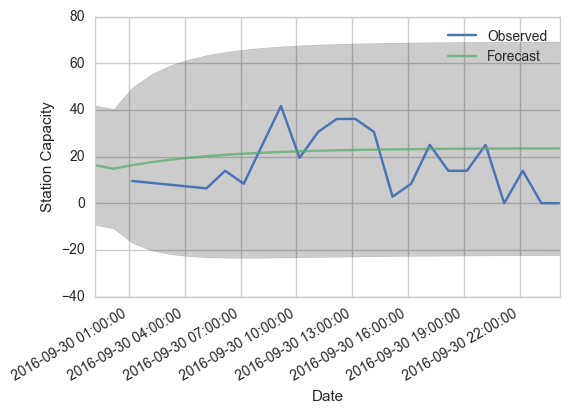

RMSE: 13.28
Order: (1,0,0)


Station 31616
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


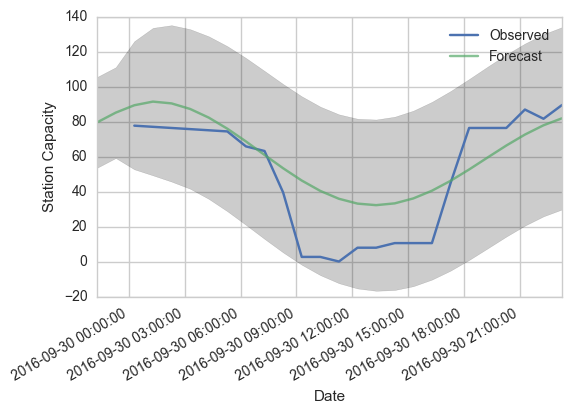

RMSE: 20.47
Order: (2,0,5)


Station 31623
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



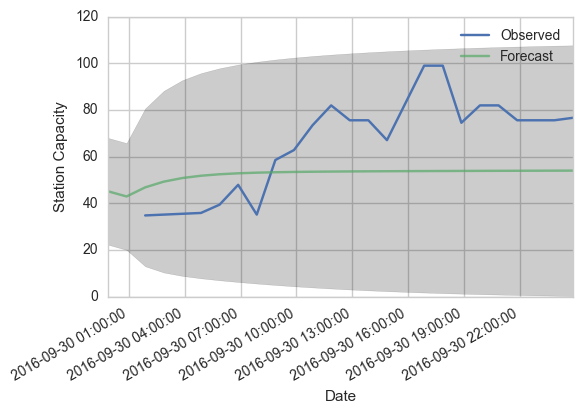

RMSE: 22.96
Order: (2,0,2)


Station 31624
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



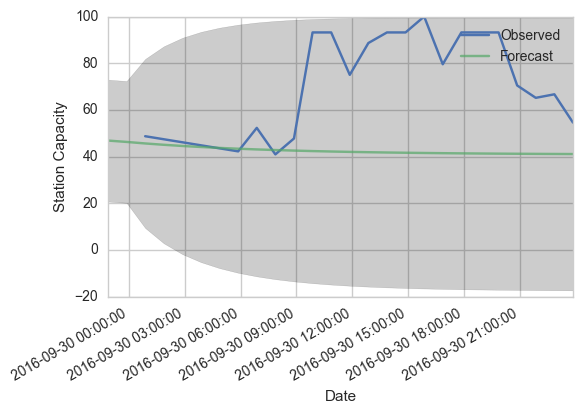

RMSE: 34.84
Order: (2,0,1)


Station 31627
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



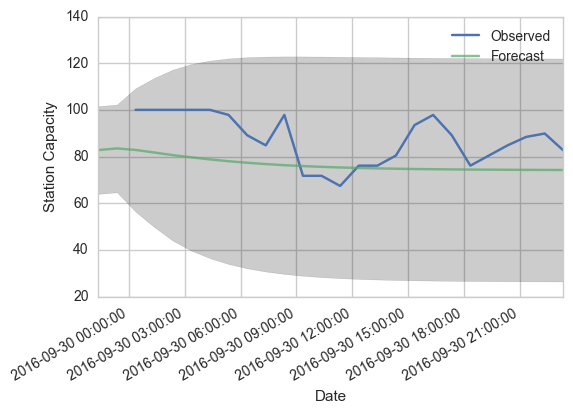

RMSE: 14.19
Order: (4,0,0)


Station 31628
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



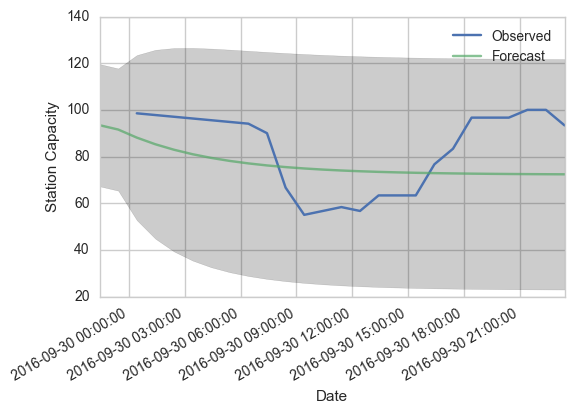

RMSE: 17.27
Order: (2,0,0)




In [69]:
for station in sorted(list(new_target_discrete_bike_data['Station_Number'].unique())):
    general_SARIMA2(station)

# Change the fitting parameters - no stepwise algorithm

In [87]:
datetime.datetime.now()

datetime.datetime(2017, 4, 25, 8, 53, 50, 588094)

In [88]:
r_order_dict2 = {}
os.chdir('/Users/WhoaaaItsDavid/Desktop/Springboard/Bike_Share/R_Series')
for filename in os.listdir('/Users/WhoaaaItsDavid/Desktop/Springboard/Bike_Share/R_Series'):
    if filename.endswith('.csv'):
        train_df = pd.read_csv(filename, header=None, names=['Date','Capacity'])
        train_df['Date'] = pd.to_datetime(train_df['Date'], infer_datetime_format=True)
        train_df.set_index('Date', inplace=True)
        r_data_crossval = train_df[:-25]
        r_data_crossval = ts(r_data_crossval)
        fit = forecast.auto_arima(r_data_crossval, d=0, max_p=10, max_q=10, start_p=1, start_q=1, ic='aic', stepwise=False, max_order=10, parallel=True)
        forecast_output = forecast.forecast(fit)
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] \"ARIMA').rstrip('"\n').split(',')[2].rstrip(')'))
        except:
            pass
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with non-zero mean\"\n').split(',')[2].rstrip(')'))
        except:
            pass
        
        try:
            p = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[0].lstrip('('))
            d = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[1])
            q = int(str(forecast_output[0]).lstrip('[1] "ARIMA').rstrip(' with drift\"\n').split(',')[2].rstrip(')'))
        except:
            pass

        print('Done: {}'.format(filename))
        r_order_dict2[filename.rstrip('.csv')] = [p,d,q]

Done: 31014.csv
Done: 31101.csv
Done: 31104.csv
Done: 31108.csv
Done: 31109.csv
Done: 31110.csv
Done: 31114.csv
Done: 31116.csv
Done: 31119.csv
Done: 31121.csv
Done: 31200.csv
Done: 31201.csv
Done: 31202.csv
Done: 31203.csv
Done: 31205.csv
Done: 31212.csv
Done: 31213.csv
Done: 31214.csv
Done: 31215.csv
Done: 31218.csv
Done: 31219.csv
Done: 31222.csv
Done: 31223.csv
Done: 31225.csv
Done: 31227.csv
Done: 31228.csv
Done: 31229.csv
Done: 31230.csv
Done: 31231.csv
Done: 31232.csv
Done: 31233.csv
Done: 31234.csv
Done: 31237.csv
Done: 31238.csv
Done: 31239.csv
Done: 31240.csv
Done: 31241.csv
Done: 31243.csv
Done: 31244.csv
Done: 31245.csv
Done: 31246.csv
Done: 31247.csv
Done: 31248.csv
Done: 31249.csv
Done: 31257.csv
Done: 31258.csv
Done: 31263.csv
Done: 31265.csv
Done: 31266.csv
Done: 31267.csv
Done: 31268.csv
Done: 31269.csv
Done: 31270.csv
Done: 31271.csv
Done: 31272.csv
Done: 31277.csv
Done: 31278.csv
Done: 31281.csv
Done: 31600.csv
Done: 31602.csv
Done: 31603.csv
Done: 31613.csv
Done: 31

In [89]:
datetime.datetime.now()

datetime.datetime(2017, 4, 25, 11, 54, 34, 185318)

In [90]:
r_order_dict2

{'31014': [2, 0, 8],
 '31101': [2, 0, 6],
 '31104': [8, 0, 2],
 '31108': [9, 0, 0],
 '31109': [2, 0, 6],
 '31110': [3, 0, 4],
 '31114': [2, 0, 8],
 '31116': [2, 0, 6],
 '31119': [2, 0, 7],
 '31121': [7, 0, 2],
 '31200': [9, 0, 1],
 '31201': [2, 0, 8],
 '31202': [2, 0, 8],
 '31203': [2, 0, 6],
 '31205': [4, 0, 3],
 '31212': [2, 0, 7],
 '31213': [2, 0, 8],
 '31214': [2, 0, 7],
 '31215': [5, 0, 4],
 '31218': [1, 0, 9],
 '31219': [5, 0, 2],
 '31222': [4, 0, 5],
 '31223': [3, 0, 7],
 '31225': [3, 0, 4],
 '31227': [10, 0, 0],
 '31228': [6, 0, 4],
 '31229': [2, 0, 5],
 '31230': [4, 0, 2],
 '31231': [6, 0, 2],
 '31232': [2, 0, 8],
 '31233': [2, 0, 8],
 '31234': [3, 0, 5],
 '31237': [6, 0, 3],
 '31238': [2, 0, 7],
 '31239': [8, 0, 2],
 '31240': [3, 0, 5],
 '31241': [9, 0, 1],
 '31243': [8, 0, 1],
 '31244': [1, 0, 7],
 '31245': [2, 0, 8],
 '31246': [2, 0, 8],
 '31247': [2, 0, 6],
 '31248': [2, 0, 8],
 '31249': [4, 0, 1],
 '31257': [6, 0, 2],
 '31258': [8, 0, 2],
 '31263': [6, 0, 4],
 '31265': [2

In [92]:
def general_SARIMA3(station, enforce_stationarity=False, enforce_invertibility=False):

    # Mask for station and transform to series object
    station_df = new_target_discrete_bike_data[new_target_discrete_bike_data['Station_Number'] == station]
    station_df = station_df[['Count_Percent_Capacity', 'Date']]
    series_station = station_df.set_index('Date')
    series_station = series_station['Count_Percent_Capacity'] 

    # Test stationarity
    print('Station {}'.format(station))
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series_station, autolag='AIC')
    if dftest[0] < dftest[4]['1%']:
        print('We are 99% confident that the series is stationary.\n')
    elif dftest[0] < dftest[4]['5%']:
        print('We are 95% confident that the series is stationary.\n')
    elif dftest[0] < dftest[4]['10%']:
        print('We are 90% confident that the series is stationary.\n')
    else:
        print('We are not confident that the series is stationary.\n')

    # SARIMAX Model without exogs
    X = series_station.copy()
    size = int(len(X) * 0.995)
    X_train, X_test = X[(int(len(X) * 0.90)):-25], X[-24:]

    model = SARIMAX(X_train,
                    enforce_stationarity=enforce_stationarity,
                    enforce_invertibility=enforce_invertibility,
                    order=(r_order_dict2[str(station)][0], 
                           r_order_dict2[str(station)][1], 
                           r_order_dict2[str(station)][2]),
                    trend='c')
    results_SARIMAX = model.fit()

    # Plot the forecast
    pred = results_SARIMAX.get_prediction(start=X_train.index[-1], 
                                          end=X_test.index[-1],
                                          dynamic=False)
    pred_ci = pred.conf_int()

    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)

    ax = X_test.plot(label='Observed')
    pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Station Capacity')
    plt.legend()

    plt.show()

    # Compute the RMSE
    y_forecasted = pred.predicted_mean
    y_truth = X_test
    mse = ((y_forecasted - y_truth) ** 2).mean()
    rmse = mse**0.5
    print('RMSE: {:.2f}'.format(rmse))
    print('Order: ({},{},{})\n\n'.format(r_order_dict2[str(station)][0], 
                                     r_order_dict2[str(station)][1], 
                                     r_order_dict2[str(station)][2]))

Station 31014
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



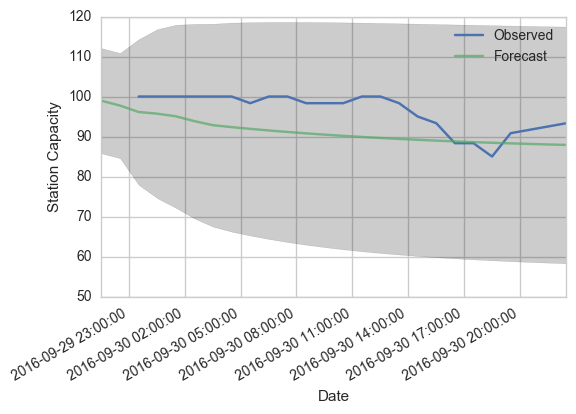

RMSE: 6.47
Order: (2,0,8)


Station 31101
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


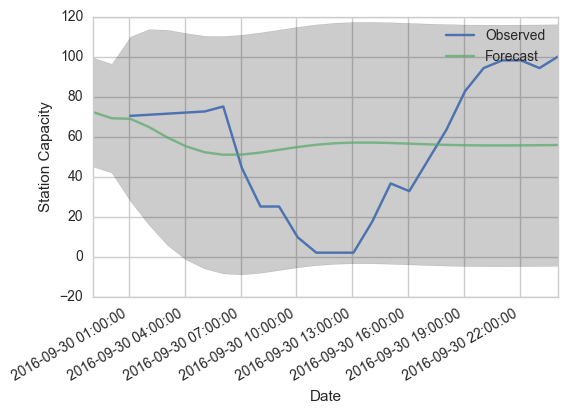

RMSE: 32.90
Order: (2,0,6)


Station 31104
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


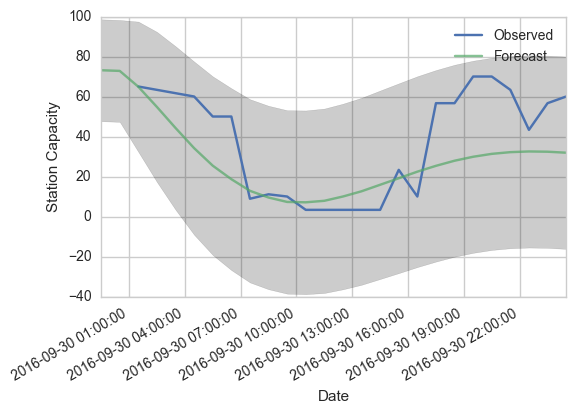

RMSE: 20.94
Order: (8,0,2)


Station 31108
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



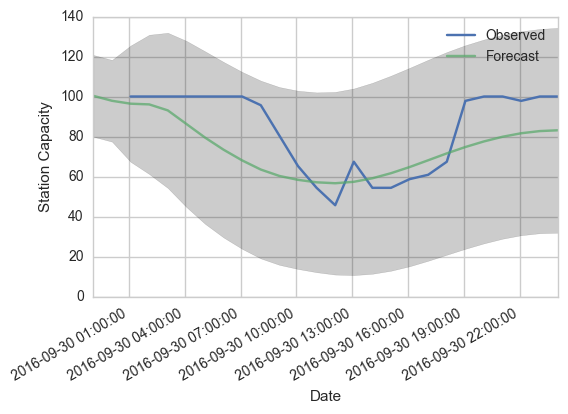

RMSE: 16.58
Order: (9,0,0)


Station 31109
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


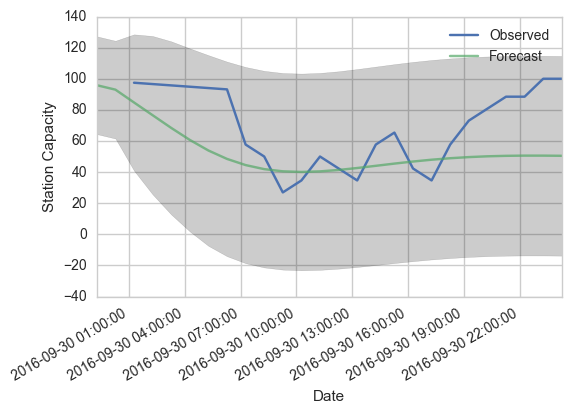

RMSE: 26.48
Order: (2,0,6)


Station 31110
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


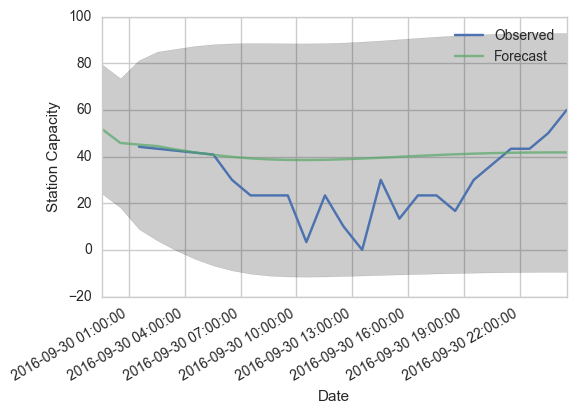

RMSE: 17.29
Order: (3,0,4)


Station 31114
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


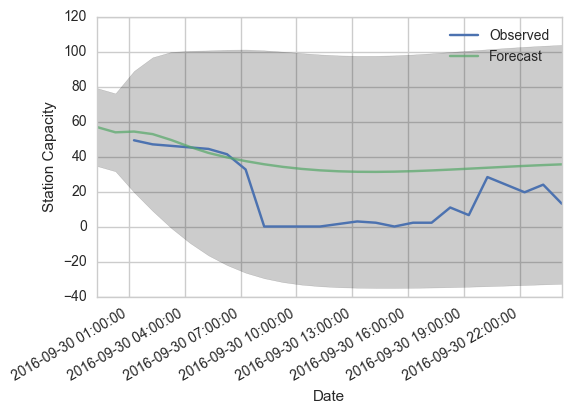

RMSE: 22.46
Order: (2,0,8)


Station 31116
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


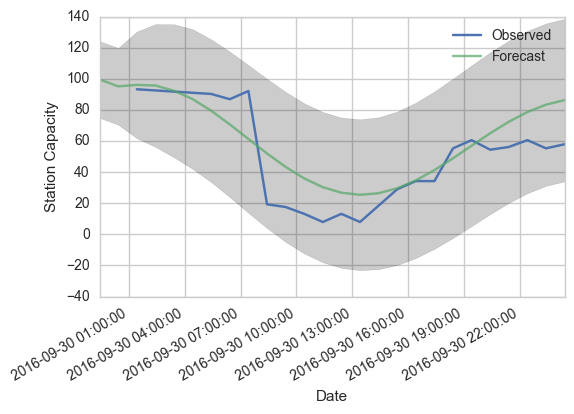

RMSE: 17.16
Order: (2,0,6)


Station 31119
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


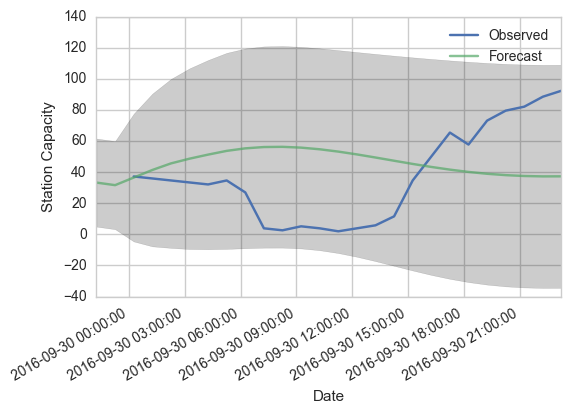

RMSE: 36.68
Order: (2,0,7)


Station 31121
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


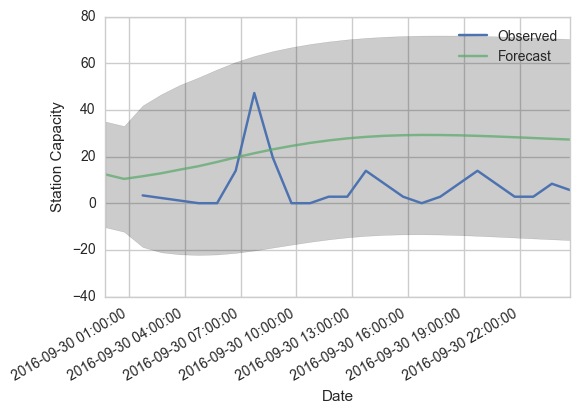

RMSE: 20.59
Order: (7,0,2)


Station 31200
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



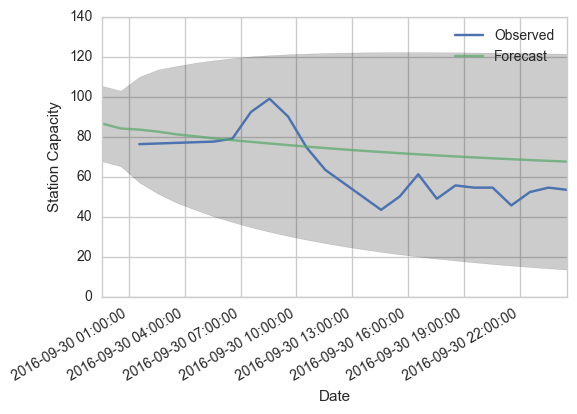

RMSE: 15.37
Order: (9,0,1)


Station 31201
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



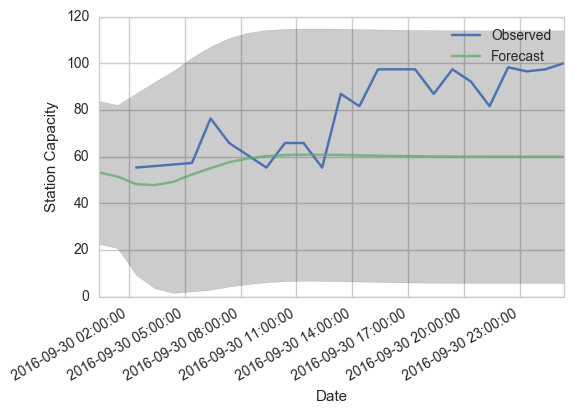

RMSE: 25.43
Order: (2,0,8)


Station 31202
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


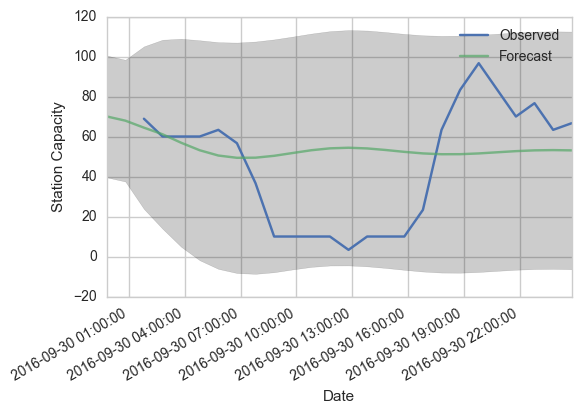

RMSE: 30.26
Order: (2,0,8)


Station 31203
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


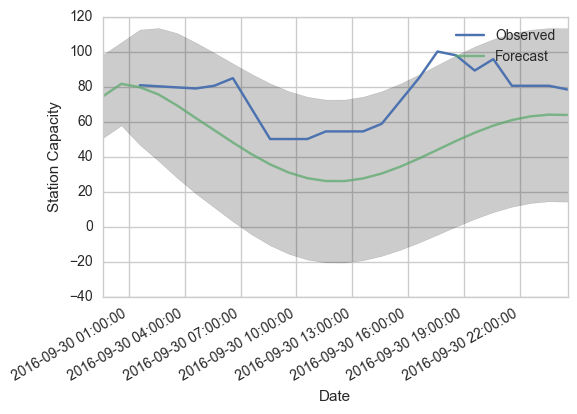

RMSE: 29.05
Order: (2,0,6)


Station 31205
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



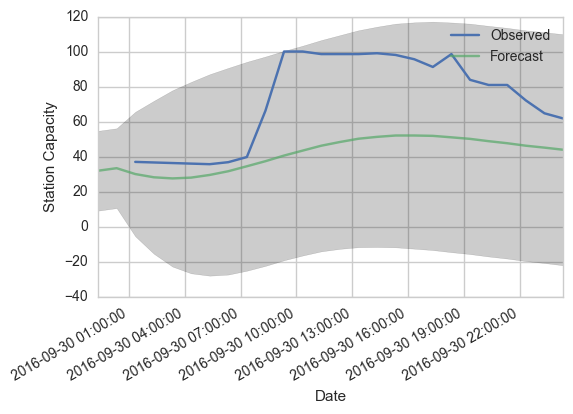

RMSE: 35.53
Order: (4,0,3)


Station 31212
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


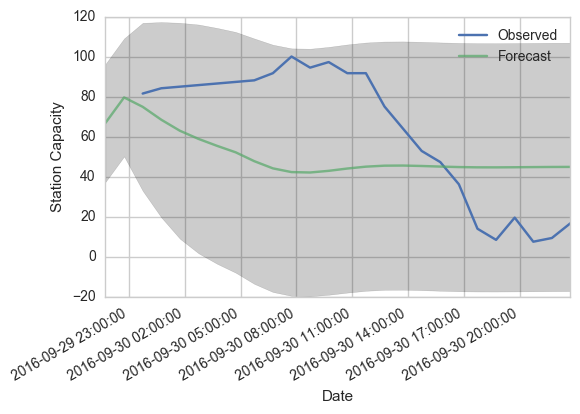

RMSE: 34.64
Order: (2,0,7)


Station 31213
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


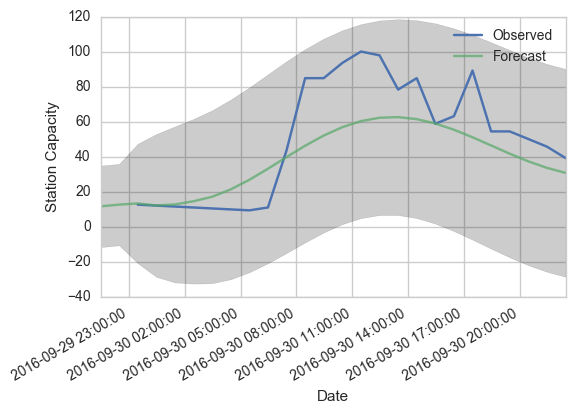

RMSE: 21.10
Order: (2,0,8)


Station 31214
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


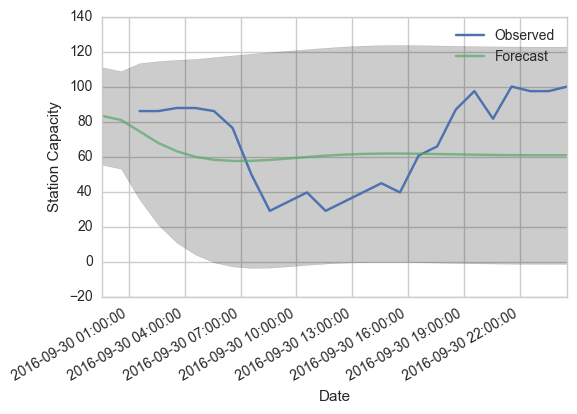

RMSE: 25.88
Order: (2,0,7)


Station 31215
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


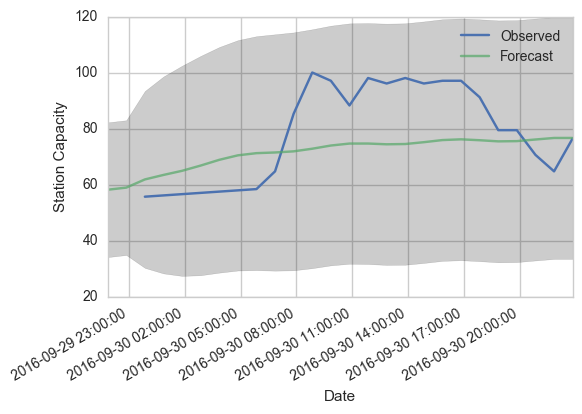

RMSE: 15.46
Order: (5,0,4)


Station 31218
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



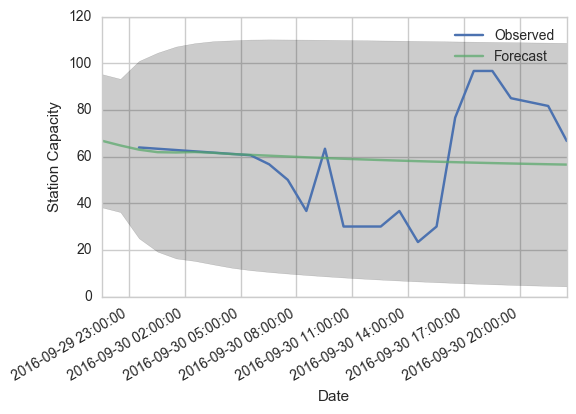

RMSE: 21.66
Order: (1,0,9)


Station 31219
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


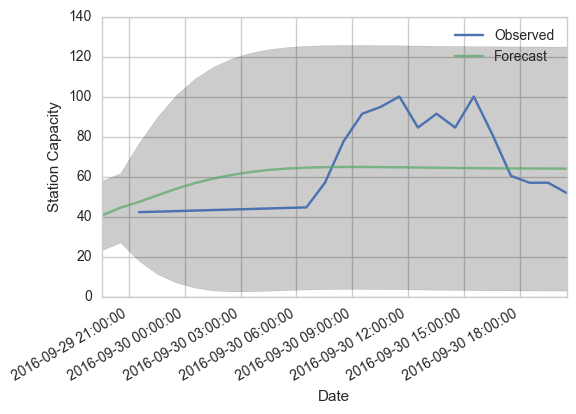

RMSE: 19.27
Order: (5,0,2)


Station 31222
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


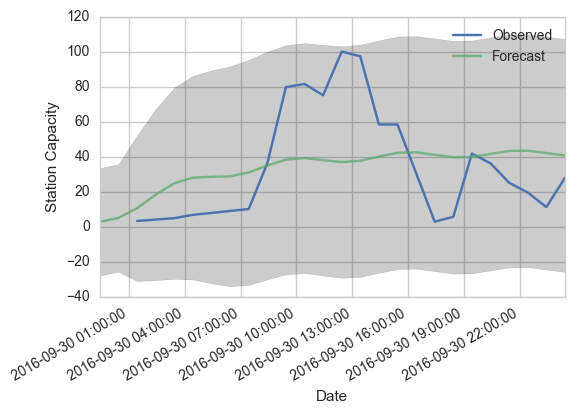

RMSE: 29.02
Order: (4,0,5)


Station 31223
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


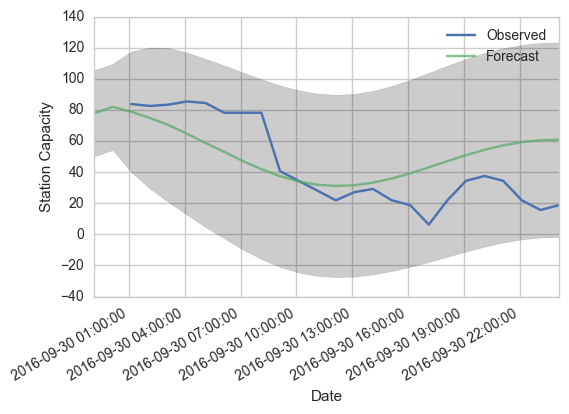

RMSE: 23.50
Order: (3,0,7)


Station 31225
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


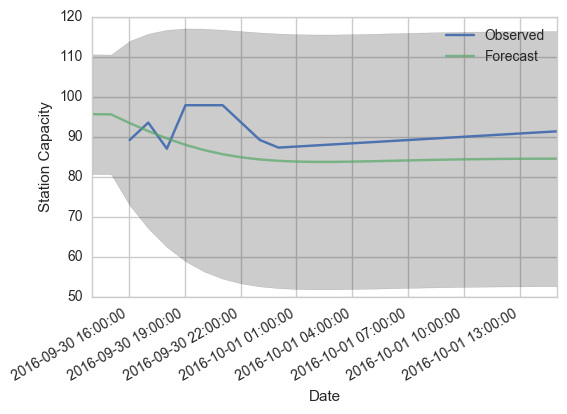

RMSE: 6.29
Order: (3,0,4)


Station 31227
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



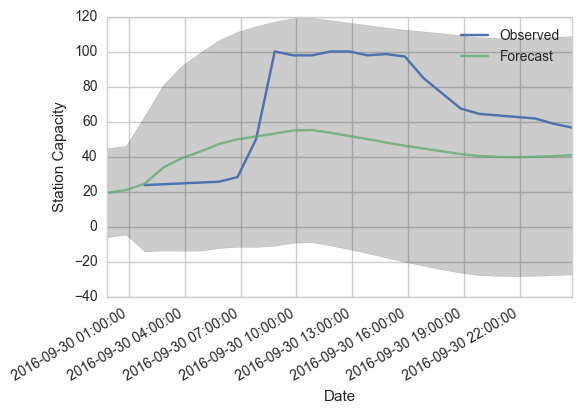

RMSE: 32.58
Order: (10,0,0)


Station 31228
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


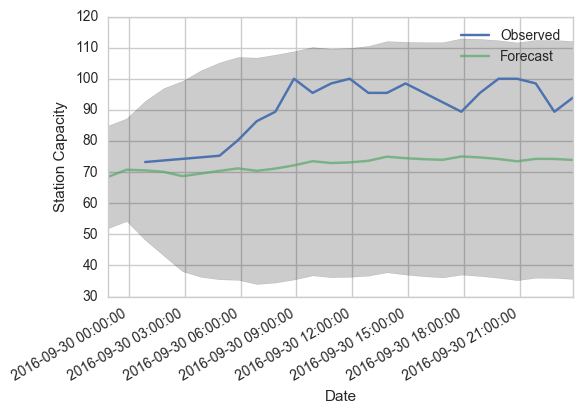

RMSE: 19.26
Order: (6,0,4)


Station 31229
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


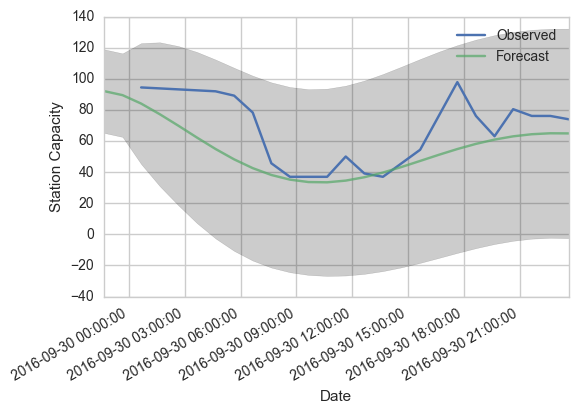

RMSE: 20.44
Order: (2,0,5)


Station 31230
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


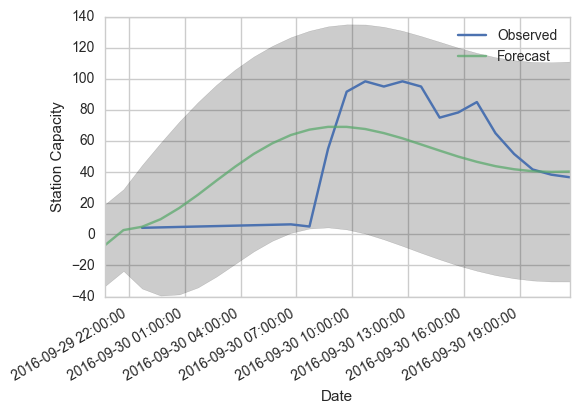

RMSE: 31.27
Order: (4,0,2)


Station 31231
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


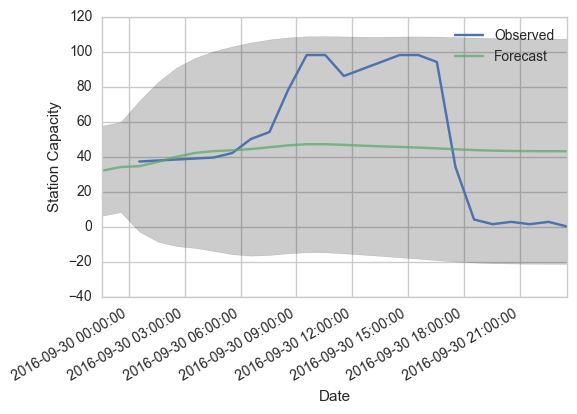

RMSE: 35.61
Order: (6,0,2)


Station 31232
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


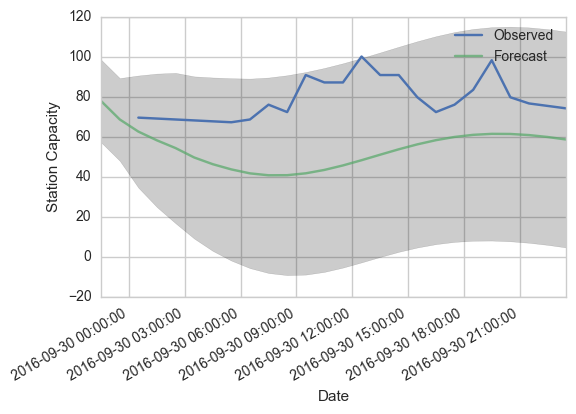

RMSE: 29.12
Order: (2,0,8)


Station 31233
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


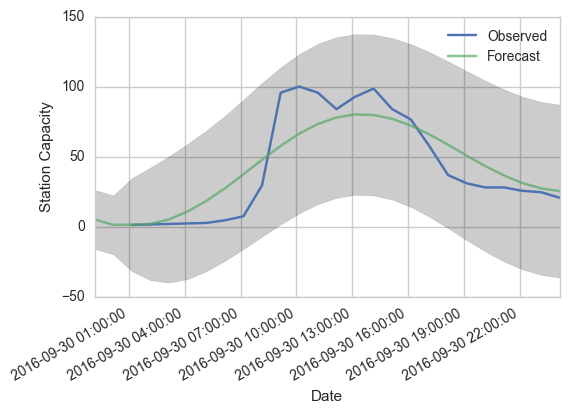

RMSE: 17.17
Order: (2,0,8)


Station 31234
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


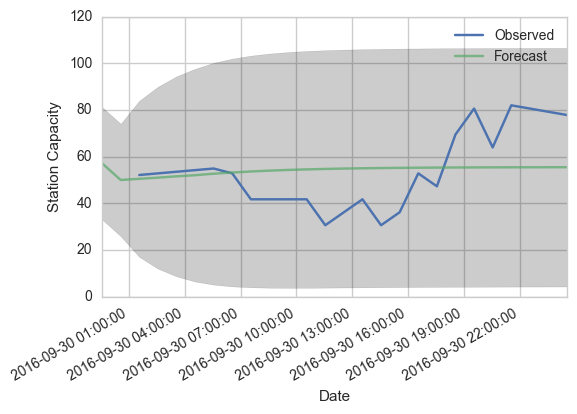

RMSE: 15.93
Order: (3,0,5)


Station 31237
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


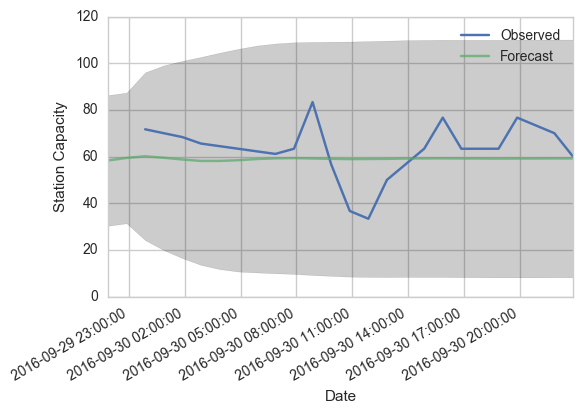

RMSE: 11.75
Order: (6,0,3)


Station 31238
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


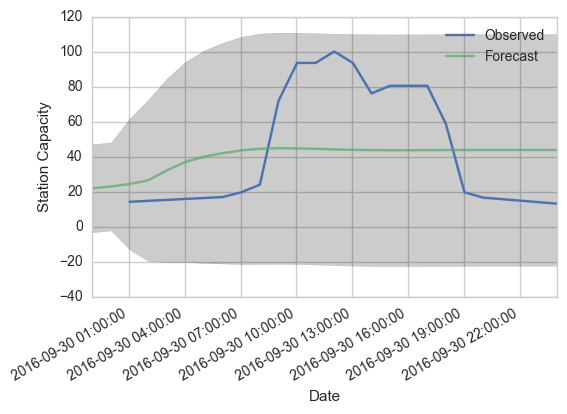

RMSE: 31.89
Order: (2,0,7)


Station 31239
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


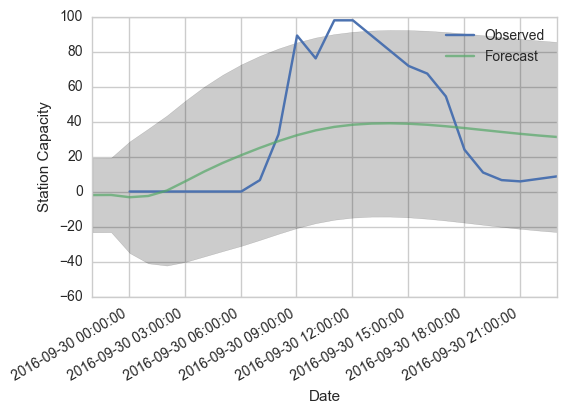

RMSE: 31.14
Order: (8,0,2)


Station 31240
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


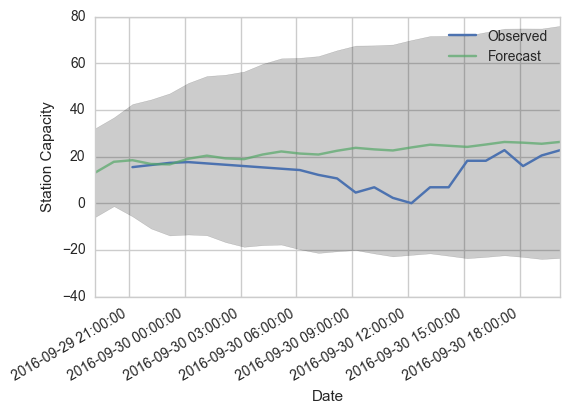

RMSE: 10.97
Order: (3,0,5)


Station 31241
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


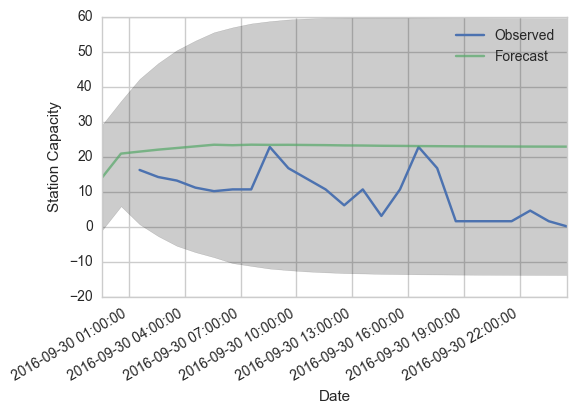

RMSE: 14.85
Order: (9,0,1)


Station 31243
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


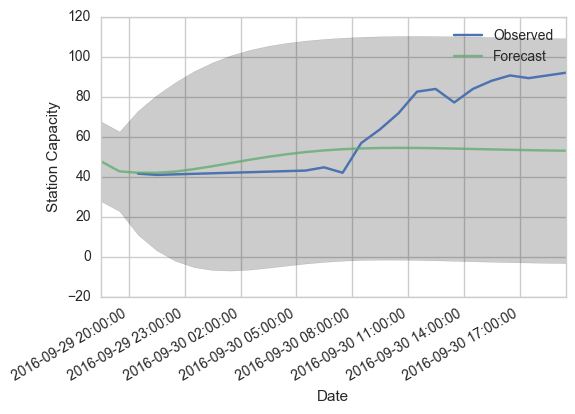

RMSE: 21.20
Order: (8,0,1)


Station 31244
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



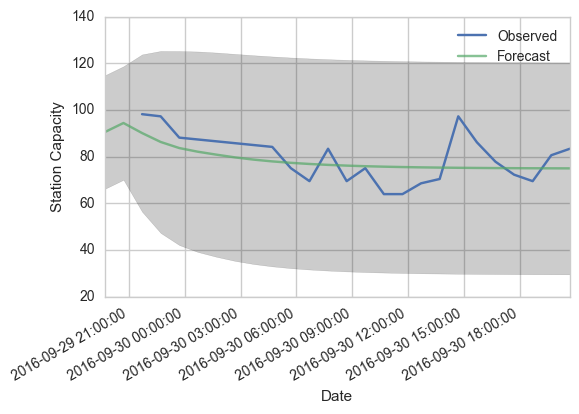

RMSE: 8.25
Order: (1,0,7)


Station 31245
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


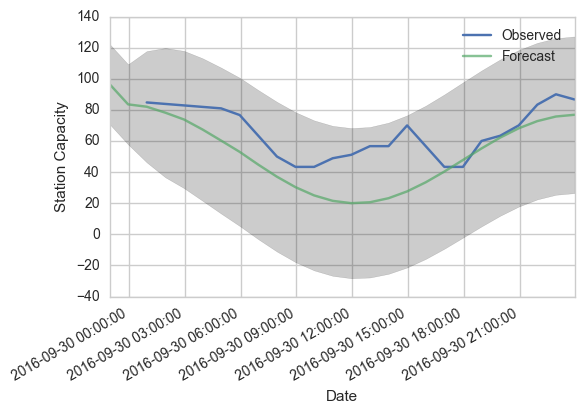

RMSE: 19.67
Order: (2,0,8)


Station 31246
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


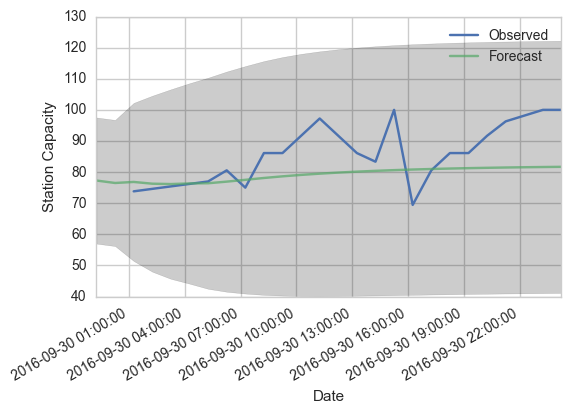

RMSE: 10.48
Order: (2,0,8)


Station 31247
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



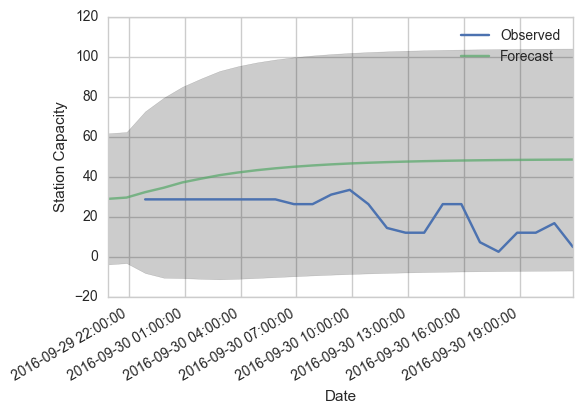

RMSE: 26.21
Order: (2,0,6)


Station 31248
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



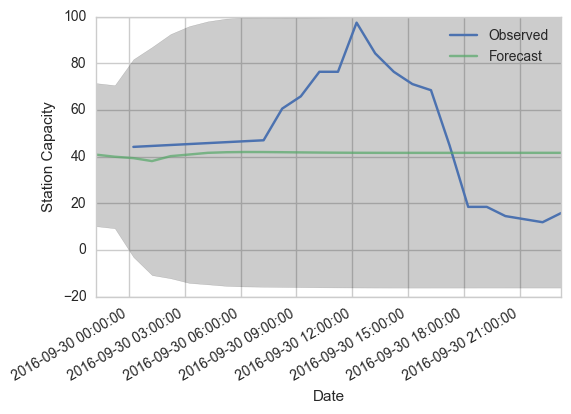

RMSE: 25.35
Order: (2,0,8)


Station 31249
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



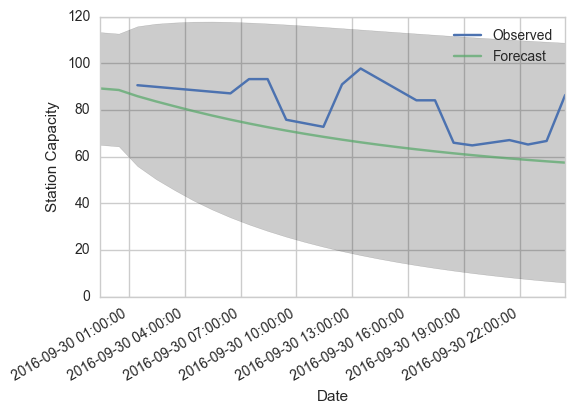

RMSE: 16.14
Order: (4,0,1)


Station 31257
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


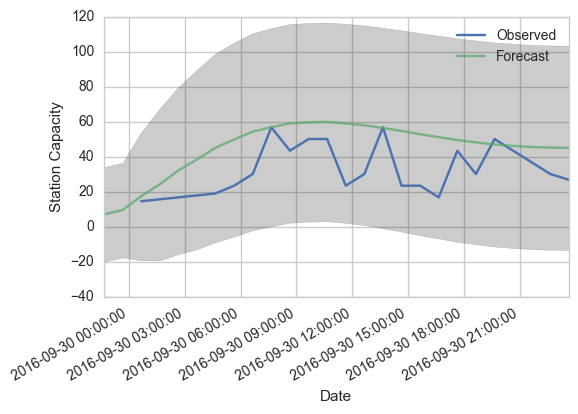

RMSE: 19.61
Order: (6,0,2)


Station 31258
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



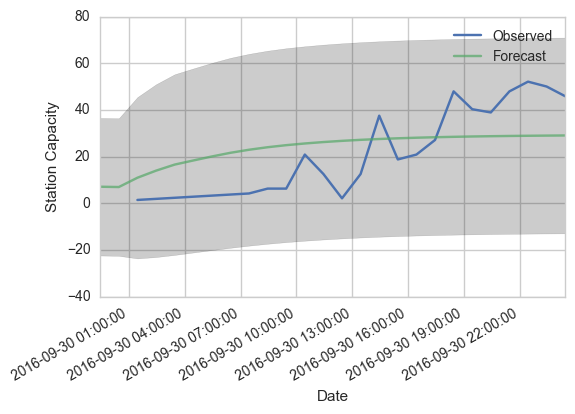

RMSE: 15.56
Order: (8,0,2)


Station 31263
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


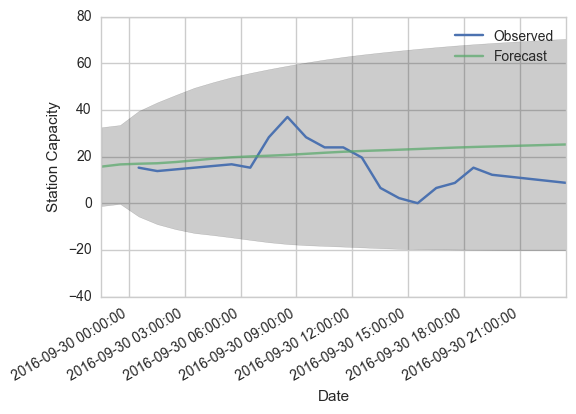

RMSE: 11.78
Order: (6,0,4)


Station 31265
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


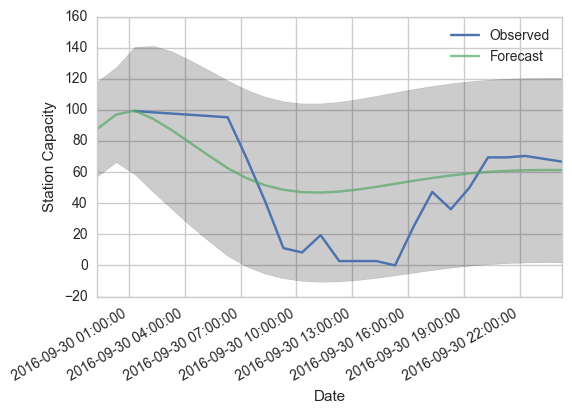

RMSE: 26.69
Order: (2,0,7)


Station 31266
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


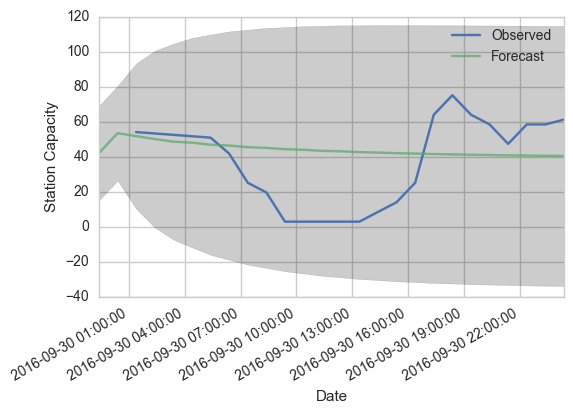

RMSE: 25.15
Order: (2,0,4)


Station 31267
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



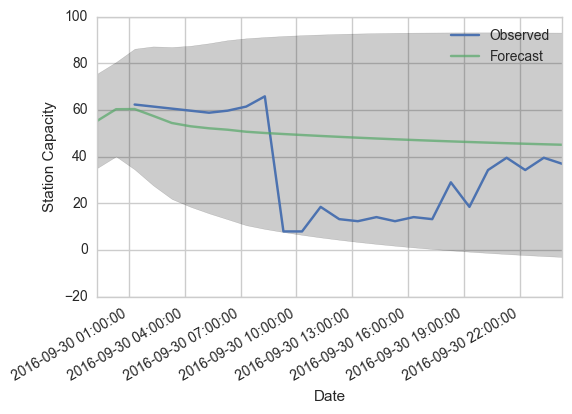

RMSE: 23.76
Order: (1,0,9)


Station 31268
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


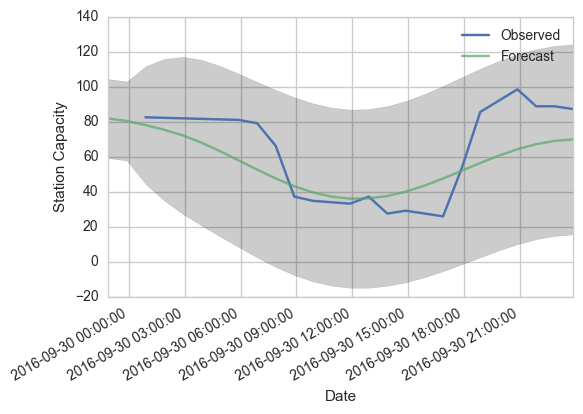

RMSE: 17.61
Order: (2,0,8)


Station 31269
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



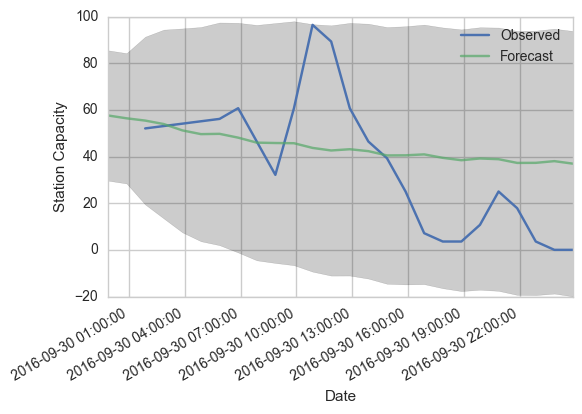

RMSE: 25.13
Order: (6,0,4)


Station 31270
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


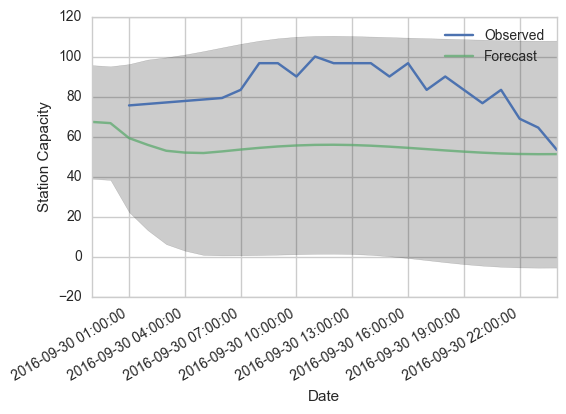

RMSE: 31.82
Order: (2,0,8)


Station 31271
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


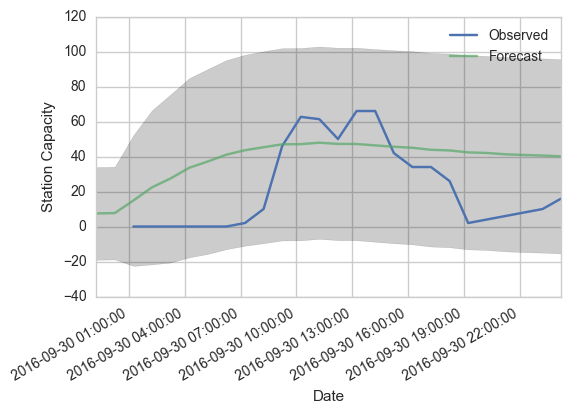

RMSE: 26.83
Order: (6,0,3)


Station 31272
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


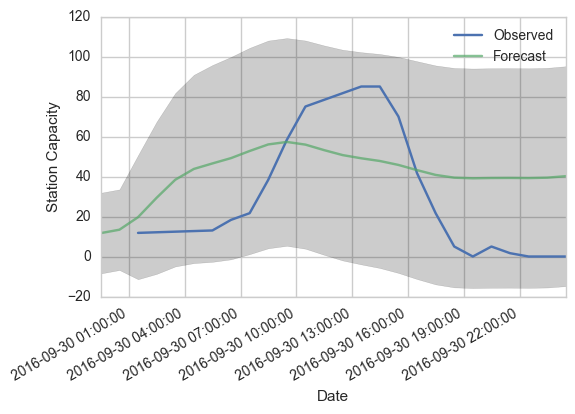

RMSE: 29.54
Order: (8,0,2)


Station 31277
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


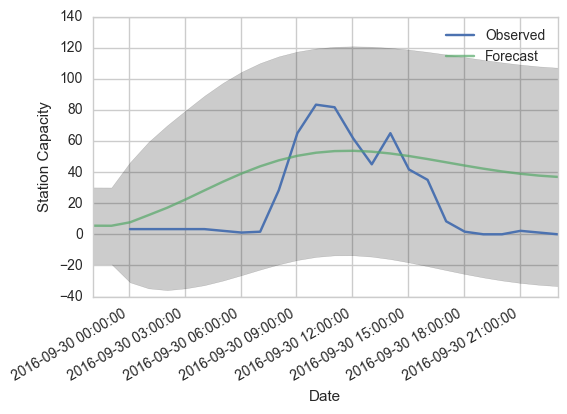

RMSE: 28.19
Order: (3,0,5)


Station 31278
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


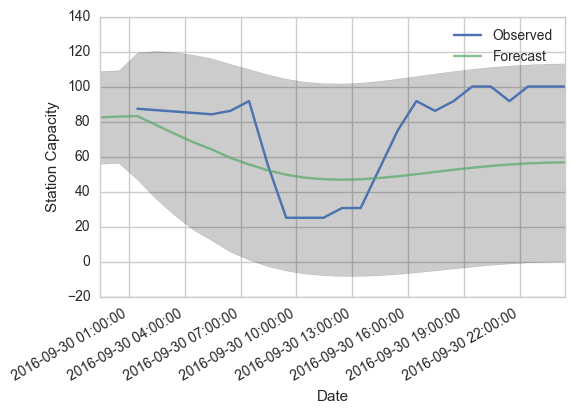

RMSE: 29.98
Order: (7,0,2)


Station 31281
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


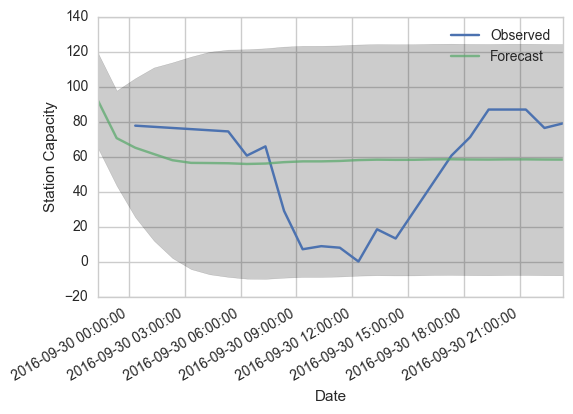

RMSE: 29.84
Order: (5,0,2)


Station 31600
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


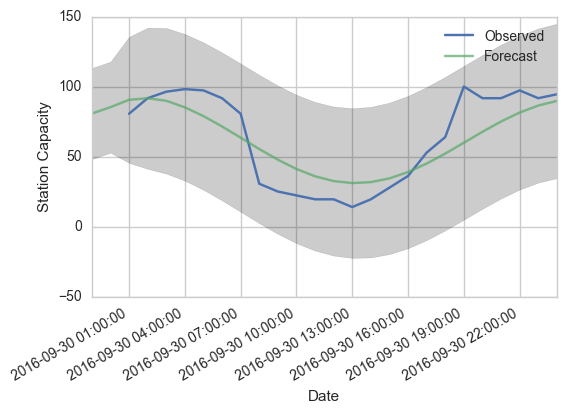

RMSE: 16.75
Order: (2,0,5)


Station 31602
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


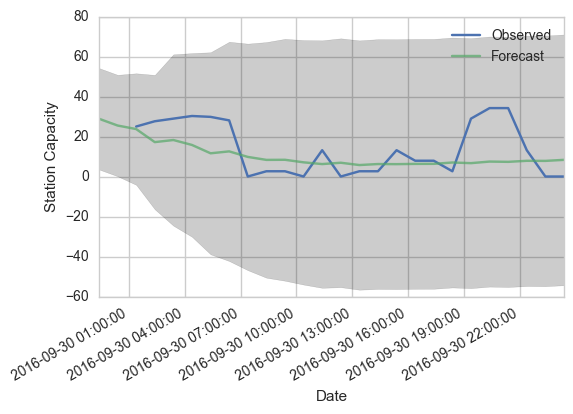

RMSE: 12.08
Order: (7,0,3)


Station 31603
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


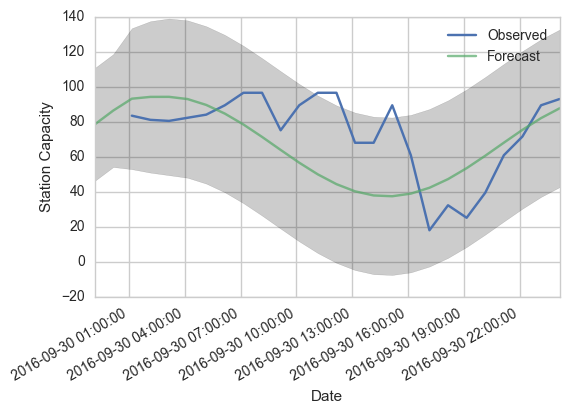

RMSE: 24.80
Order: (2,0,6)


Station 31613
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



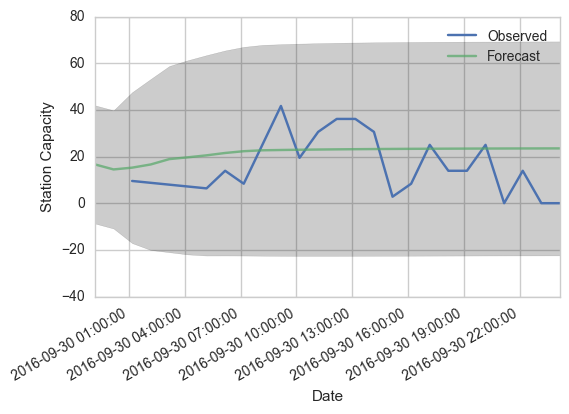

RMSE: 13.26
Order: (1,0,9)


Station 31616
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


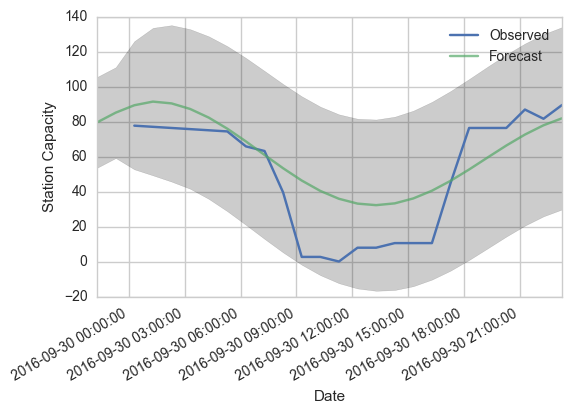

RMSE: 20.47
Order: (2,0,5)


Station 31623
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


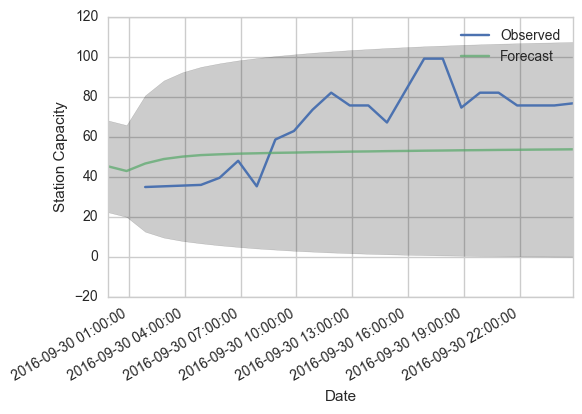

RMSE: 23.42
Order: (6,0,4)


Station 31624
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


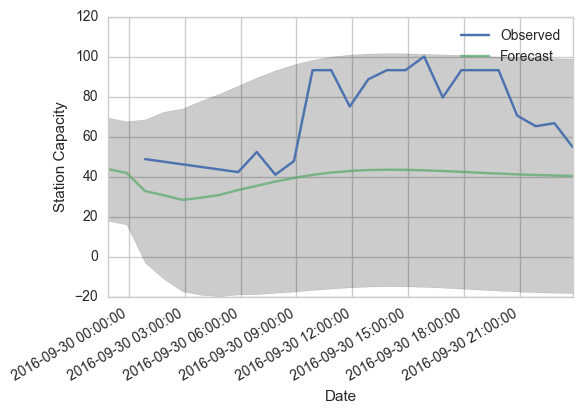

RMSE: 35.33
Order: (3,0,7)


Station 31627
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



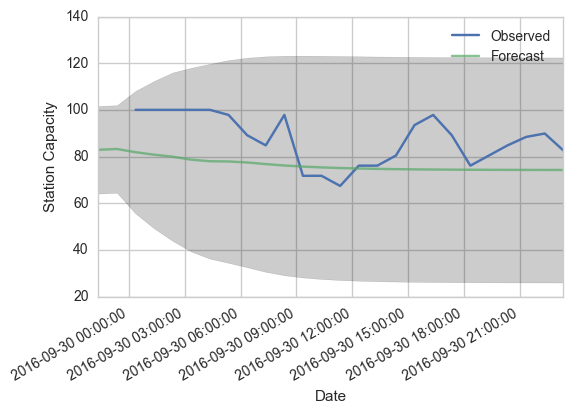

RMSE: 14.47
Order: (1,0,9)


Station 31628
Results of Dickey-Fuller Test:
We are 99% confident that the series is stationary.



/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


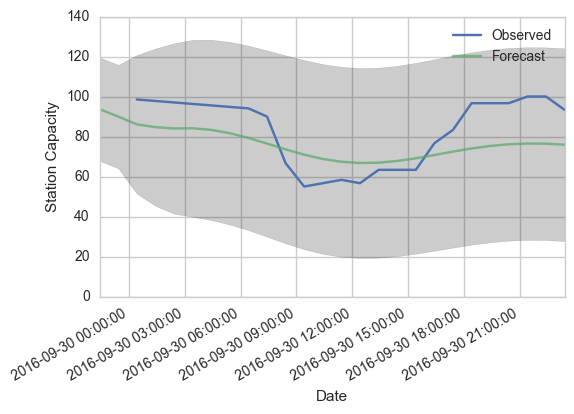

RMSE: 14.46
Order: (2,0,8)




In [93]:
for station in sorted(list(new_target_discrete_bike_data['Station_Number'].unique())):
    general_SARIMA3(station)